# COMP4605.1 Data Mining Project
# Summary
Basketball, like other sports, is one of the universal sports.Analysts keep statistics for each team and also for each player in these sports.Of course, there are factors that affect these statistics. For example, a health problem cannot be predicted by anyone. Here I purpose look at the relationships of players and teams with each other.I also wanted to do a separate research for Turkish players as the NBA is a national league.
# Data
In this project I will use the statistics of NBA teams and NBA players.I have the statistics of NBA teams between 2000-2018 and the statistics of NBA players between 1950-2020 and last one the statistics of NBA foreign players between 2019-2020.NBA team data includes information such as the number of matches played, wins and defeats.In the NBA player data, there are the team played, the points scored and other similar statistics and my last data cover player countries.


# All Data Description

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
statsN = pd.read_csv("nnba_full_final.csv")
statsN

,Unnamed: 0,player,pos,age,tm,g,gs,mp,fg,fga,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
0,0,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,...,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1949-50
1,1,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,...,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1949-50
2,2,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,...,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1949-50
3,3,Ed Bartels,F,24,TOT,15,NaN,NaN,1.5,5.7,...,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1949-50
4,4,Ralph Beard,G,22,INO,60,NaN,NaN,5.7,15.6,...,NaN,NaN,NaN,3.9,NaN,NaN,NaN,2.2,14.9,1949-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21846,21907,Trae Young,PG,21,ATL,60,60.0,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2019-20
21847,21908,Cody Zeller,C,27,CHO,58,39.0,23.1,4.3,8.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2019-20
21848,21909,Tyler Zeller,C,30,SAS,2,NaN,2.0,0.5,2.0,...,1.5,0.5,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2019-20
21849,21910,Ante Zizic,C,23,CLE,22,NaN,10.0,1.9,3.3,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2019-20


In [92]:
statsN.columns

Index(['Unnamed: 0', 'player', 'pos', 'age', 'tm', 'g', 'gs', 'mp', 'fg',
       'fga', 'fgpercent', 'p3', 'pa3', 'p3percent', 'p2', 'pa2', 'p2percent',
       'efgpercent', 'ft', 'fta', 'ftpercent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'year'],
      dtype='object')

In [93]:
statsN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21851 entries, 0 to 21850
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  21851 non-null  int64  
 1   player      21851 non-null  object 
 2   pos         21851 non-null  object 
 3   age         21851 non-null  int64  
 4   tm          21851 non-null  object 
 5   g           21851 non-null  int64  
 6   gs          12586 non-null  float64
 7   mp          21493 non-null  float64
 8   fg          21646 non-null  float64
 9   fga         21851 non-null  float64
 10  fgpercent   21646 non-null  float64
 11  p3          9593 non-null   float64
 12  pa3         12420 non-null  float64
 13  p3percent   11310 non-null  float64
 14  p2          21595 non-null  float64
 15  pa2         21819 non-null  float64
 16  p2percent   21598 non-null  float64
 17  efgpercent  21646 non-null  float64
 18  ft          21157 non-null  float64
 19  fta         21310 non-nul

In [94]:
statsN.describe()

,Unnamed: 0,age,g,gs,mp,fg,fga,fgpercent,p3,pa3,...,ftpercent,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,21851.000000,21851.000000,21851.000000,12586.000000,21493.000000,21646.000000,21851.000000,21646.000000,9593.000000,12420.000000,...,21187.000000,18060.000000,18424.000000,21470.000000,21316.000000,17866.000000,16111.000000,17340.000000,21681.000000,21714.000000
mean,10949.545330,26.551920,55.787561,35.000953,20.955311,3.357798,7.413940,0.439940,0.770301,1.727681,...,0.727337,1.113643,2.629402,3.903265,2.018826,0.723967,0.494314,1.321482,2.080112,8.772566
std,6326.111943,3.916706,24.808152,29.428834,10.279016,2.335224,4.885654,0.080101,0.649497,1.697158,...,0.123454,0.874892,1.849542,2.878308,1.833164,0.475707,0.527004,0.824905,0.877327,6.179495
min,0.000000,18.000000,1.000000,1.000000,0.700000,0.100000,0.200000,0.056000,0.100000,0.100000,...,0.111000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
25%,5470.500000,23.500000,38.000000,6.000000,12.300000,1.500000,3.500000,0.400000,0.200000,0.300000,...,0.667000,0.500000,1.300000,1.900000,0.700000,0.400000,0.200000,0.700000,1.400000,3.900000
50%,10948.000000,26.000000,65.000000,27.000000,20.400000,2.800000,6.300000,0.442000,0.600000,1.200000,...,0.747000,0.900000,2.200000,3.100000,1.400000,0.600000,0.300000,1.100000,2.100000,7.300000
75%,16426.500000,29.000000,77.000000,65.000000,29.700000,4.700000,10.400000,0.482000,1.100000,2.700000,...,0.809000,1.500000,3.500000,5.100000,2.700000,1.000000,0.600000,1.800000,2.700000,12.300000
max,21911.000000,44.000000,88.000000,83.000000,48.500000,20.000000,39.500000,1.000000,5.100000,13.200000,...,1.000000,7.200000,13.700000,27.200000,14.500000,3.700000,5.600000,5.700000,6.000000,50.400000


In [5]:
statsN.head()

,Unnamed: 0,player,pos,age,tm,g,gs,mp,fg,fga,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
0,0,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,...,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1949-50
1,1,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,...,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1949-50
2,2,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,...,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1949-50
3,3,Ed Bartels,F,24,TOT,15,NaN,NaN,1.5,5.7,...,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1949-50
4,4,Ralph Beard,G,22,INO,60,NaN,NaN,5.7,15.6,...,NaN,NaN,NaN,3.9,NaN,NaN,NaN,2.2,14.9,1949-50


In [6]:
team = pd.read_csv("nba_team_stats_00_to_18.csv")
team

,id,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Atlanta Hawks,82,29,53,0.354,48.4,113.3,41.4,91.8,...,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,-6.0,2018-19
1,1,Boston Celtics,82,49,33,0.598,48.2,112.4,42.1,90.5,...,44.5,26.3,12.8,8.6,5.3,3.9,20.4,19.5,4.4,2018-19
2,2,Brooklyn Nets,82,42,40,0.512,48.7,112.2,40.3,89.7,...,46.6,23.8,15.1,6.6,4.1,5.3,21.5,22.0,-0.1,2018-19
3,3,Charlotte Hornets,82,39,43,0.476,48.4,110.7,40.2,89.8,...,43.8,23.2,12.2,7.2,4.9,6.0,18.9,20.6,-1.1,2018-19
4,4,Chicago Bulls,82,22,60,0.268,48.5,104.9,39.8,87.9,...,42.9,21.9,14.1,7.4,4.3,5.8,20.3,18.7,-8.4,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,561,Seattle SuperSonics,82,44,38,0.537,48.3,97.3,36.9,81.1,...,41.7,21.9,15.3,8.0,5.0,6.2,21.1,0.1,0.0,2000-01
562,562,Toronto Raptors,82,47,35,0.573,48.7,97.6,37.2,85.0,...,44.5,24.4,13.2,7.3,6.3,5.4,21.3,0.1,2.3,2000-01
563,563,Utah Jazz,82,53,29,0.646,48.2,97.1,36.1,76.7,...,40.6,25.7,15.8,8.1,5.6,5.5,25.7,0.1,4.7,2000-01
564,564,Vancouver Grizzlies,82,23,59,0.280,48.2,91.7,35.0,79.7,...,40.5,23.2,15.7,7.1,4.4,5.8,21.1,0.1,-5.7,2000-01


In [7]:
team.columns

Index(['id', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'SEASON'],
      dtype='object')

In [8]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      566 non-null    int64  
 1   TEAM    566 non-null    object 
 2   GP      566 non-null    int64  
 3   W       566 non-null    int64  
 4   L       566 non-null    int64  
 5   WIN%    566 non-null    float64
 6   MIN     566 non-null    float64
 7   PTS     566 non-null    float64
 8   FGM     566 non-null    float64
 9   FGA     566 non-null    float64
 10  FG%     566 non-null    float64
 11  3PM     566 non-null    float64
 12  3PA     566 non-null    float64
 13  3P%     566 non-null    float64
 14  FTM     566 non-null    float64
 15  FTA     566 non-null    float64
 16  FT%     566 non-null    float64
 17  OREB    566 non-null    float64
 18  DREB    566 non-null    float64
 19  REB     566 non-null    float64
 20  AST     566 non-null    float64
 21  TOV     566 non-null    float64
 22  ST

In [9]:
team.describe()

,id,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
count,566.0000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,282.5000,81.148410,40.574205,40.574205,0.499998,48.358481,99.655830,37.220848,82.228092,45.264841,...,31.283039,42.418728,21.846113,14.465901,7.591696,4.903357,4.904947,21.010247,15.376502,0.002120
std,163.5344,3.587474,12.356245,12.357534,0.150617,0.181802,5.946739,2.116632,3.475233,1.580439,...,2.022168,1.960658,1.991516,1.148937,0.857152,0.814475,0.707890,1.686920,9.134317,4.495011
min,0.0000,66.000000,7.000000,9.000000,0.106000,48.000000,84.200000,32.400000,74.300000,40.800000,...,26.900000,36.900000,17.400000,11.200000,5.500000,2.400000,3.000000,16.600000,0.000000,-13.900000
25%,141.2500,82.000000,32.000000,32.000000,0.390000,48.200000,95.600000,35.800000,79.725000,44.200000,...,29.800000,41.100000,20.425000,13.700000,7.000000,4.300000,4.400000,19.900000,0.200000,-3.075000
50%,282.5000,82.000000,41.000000,40.000000,0.512000,48.400000,98.800000,37.050000,81.900000,45.150000,...,31.000000,42.300000,21.600000,14.500000,7.500000,4.900000,4.900000,20.900000,20.000000,0.200000
75%,423.7500,82.000000,50.000000,49.000000,0.610000,48.500000,103.400000,38.500000,84.400000,46.200000,...,32.600000,43.700000,23.075000,15.175000,8.200000,5.400000,5.400000,22.200000,21.200000,3.400000
max,565.0000,82.000000,73.000000,72.000000,0.890000,49.000000,118.100000,44.000000,94.000000,50.400000,...,40.400000,49.700000,30.400000,18.500000,10.300000,8.200000,6.900000,26.700000,25.700000,11.600000


In [10]:
team.head()

,id,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Atlanta Hawks,82,29,53,0.354,48.4,113.3,41.4,91.8,...,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,-6.0,2018-19
1,1,Boston Celtics,82,49,33,0.598,48.2,112.4,42.1,90.5,...,44.5,26.3,12.8,8.6,5.3,3.9,20.4,19.5,4.4,2018-19
2,2,Brooklyn Nets,82,42,40,0.512,48.7,112.2,40.3,89.7,...,46.6,23.8,15.1,6.6,4.1,5.3,21.5,22.0,-0.1,2018-19
3,3,Charlotte Hornets,82,39,43,0.476,48.4,110.7,40.2,89.8,...,43.8,23.2,12.2,7.2,4.9,6.0,18.9,20.6,-1.1,2018-19
4,4,Chicago Bulls,82,22,60,0.268,48.5,104.9,39.8,87.9,...,42.9,21.9,14.1,7.4,4.3,5.8,20.3,18.7,-8.4,2018-19


In [11]:
foreign = pd.read_csv("for.csv")
foreign
#2019-2020 NBA foreign players

,COUNTRY,player,team
0,Angola,Bruno Fernando,Atlanta Hawks
1,Australia,Aron Baynes,Phoenix Suns
2,Australia,Jonah Bolden,Philadelphia 76ers
3,Australia,Ryan Broekhoff,Dallas Mavericks
4,Australia,Matthew Dellavedova,Cleveland Cavaliers
...,...,...,...
103,Turkey,Furkan Korkmaz,Philadelphia 76ers
104,Turkey,Cedi Osman,Cleveland Cavaliers
105,Ukraine,Alex Len,Atlanta Hawks
106,Ukraine,Svi Mykhailiuk,Detroit Pistons


In [12]:
foreign.head()

,COUNTRY,player,team
0,Angola,Bruno Fernando,Atlanta Hawks
1,Australia,Aron Baynes,Phoenix Suns
2,Australia,Jonah Bolden,Philadelphia 76ers
3,Australia,Ryan Broekhoff,Dallas Mavericks
4,Australia,Matthew Dellavedova,Cleveland Cavaliers


In [13]:
foreign.columns

Index(['COUNTRY', 'player', 'team'], dtype='object')

In [14]:
foreign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COUNTRY  108 non-null    object
 1   player   106 non-null    object
 2   team     106 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


# Visualizing Data

<AxesSubplot:title={'center':'Ages of all players who played between 1950 and 2019'}>

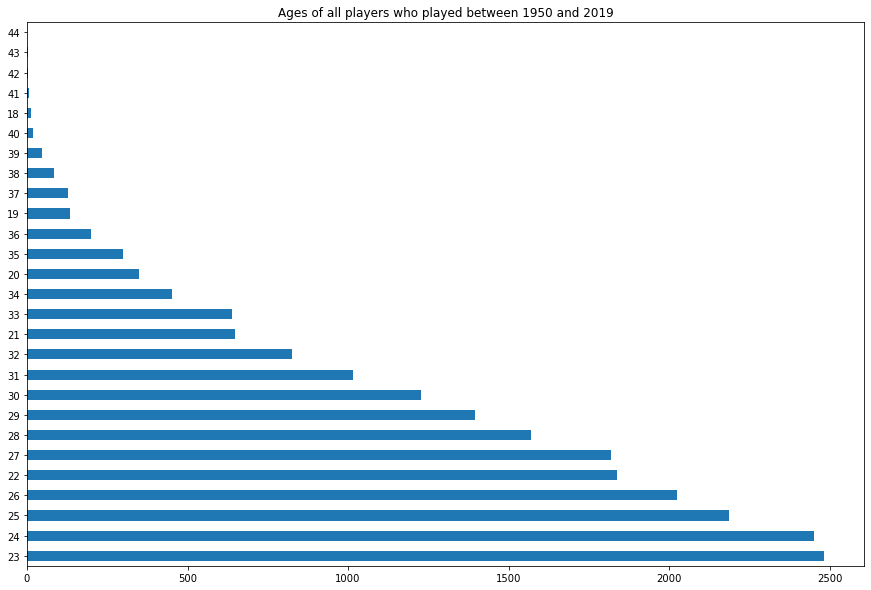

In [95]:
#Ages of all players who played between 1950 and 2019
plt.title("Ages of all players who played between 1950 and 2019")
statsN['age'].value_counts().plot(kind='barh', figsize=(15,10))
#Comment
#In this section, we can see that it is the most suitable period for players between the ages of 23 and 28.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'gs'}>,
        <AxesSubplot:title={'center':'mp'}>],
       [<AxesSubplot:title={'center':'fg'}>,
        <AxesSubplot:title={'center':'fga'}>,
        <AxesSubplot:title={'center':'fgpercent'}>,
        <AxesSubplot:title={'center':'p3'}>,
        <AxesSubplot:title={'center':'pa3'}>],
       [<AxesSubplot:title={'center':'p3percent'}>,
        <AxesSubplot:title={'center':'p2'}>,
        <AxesSubplot:title={'center':'pa2'}>,
        <AxesSubplot:title={'center':'p2percent'}>,
        <AxesSubplot:title={'center':'efgpercent'}>],
       [<AxesSubplot:title={'center':'ft'}>,
        <AxesSubplot:title={'center':'fta'}>,
        <AxesSubplot:title={'center':'ftpercent'}>,
        <AxesSubplot:title={'center':'orb'}>,
        <AxesSubplot:title={'center':'drb'}>],
       [<AxesSubplot:title={'center':'trb'}>,


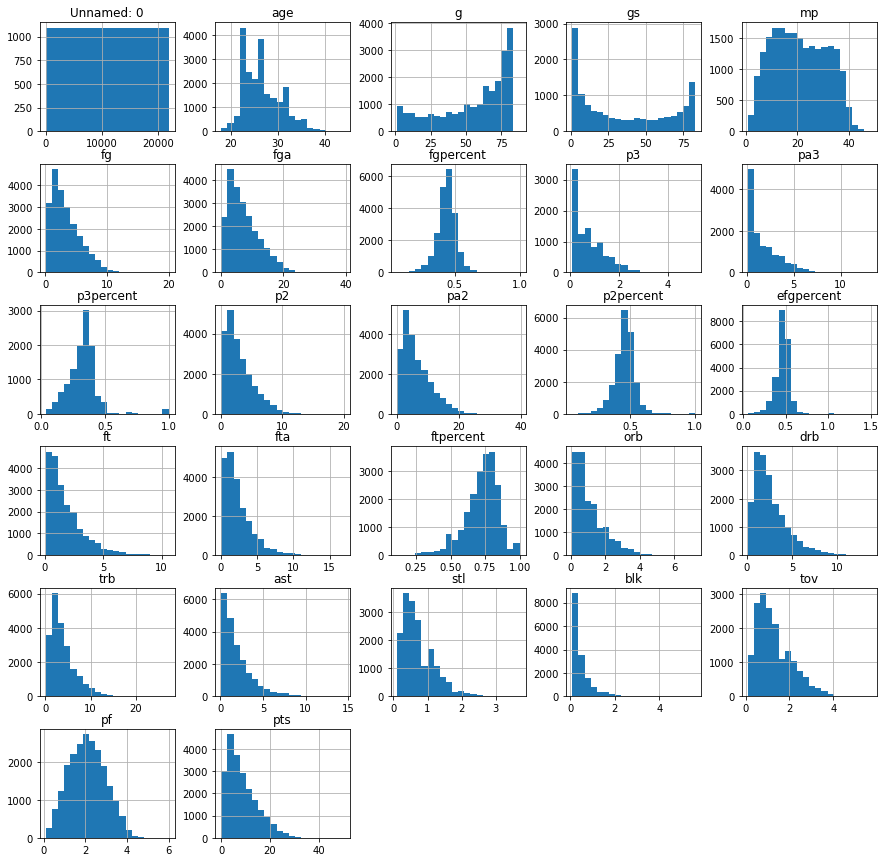

In [96]:
statsN.hist(figsize=(15,15),bins=20)

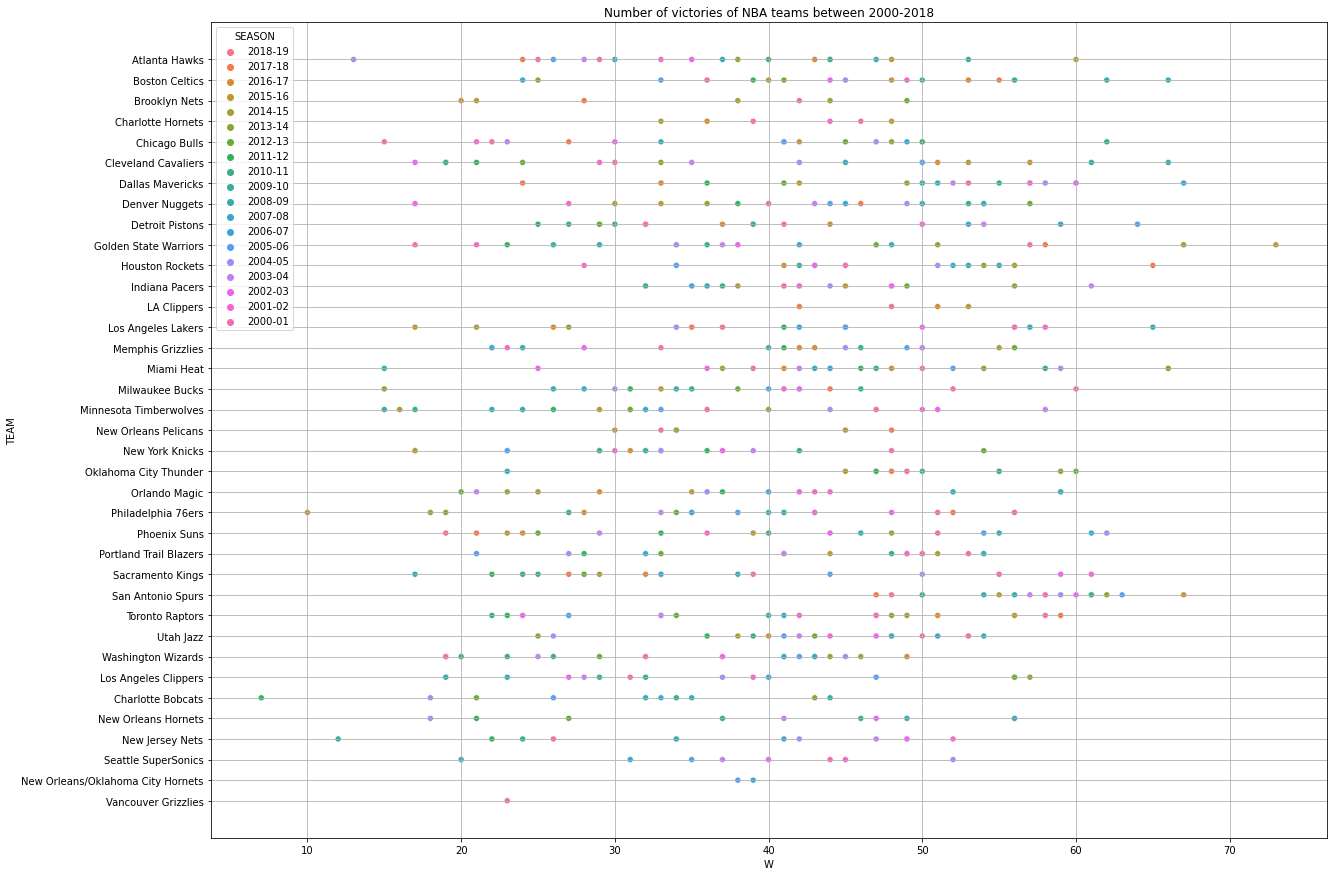

In [97]:
#Number of victories of NBA teams between 2000-2018
plt.figure(figsize=(20,15))
plt.title("Number of victories of NBA teams between 2000-2018")
sns.scatterplot(data=team,x="W",y="TEAM",hue="SEASON")
plt.grid()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'GP'}>,
        <AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'L'}>,
        <AxesSubplot:title={'center':'WIN%'}>],
       [<AxesSubplot:title={'center':'MIN'}>,
        <AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'FGM'}>,
        <AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>],
       [<AxesSubplot:title={'center':'3PM'}>,
        <AxesSubplot:title={'center':'3PA'}>,
        <AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'FTM'}>,
        <AxesSubplot:title={'center':'FTA'}>],
       [<AxesSubplot:title={'center':'FT%'}>,
        <AxesSubplot:title={'center':'OREB'}>,
        <AxesSubplot:title={'center':'DREB'}>,
        <AxesSubplot:title={'center':'REB'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TOV'}>,
        <AxesSubplot:title={'cent

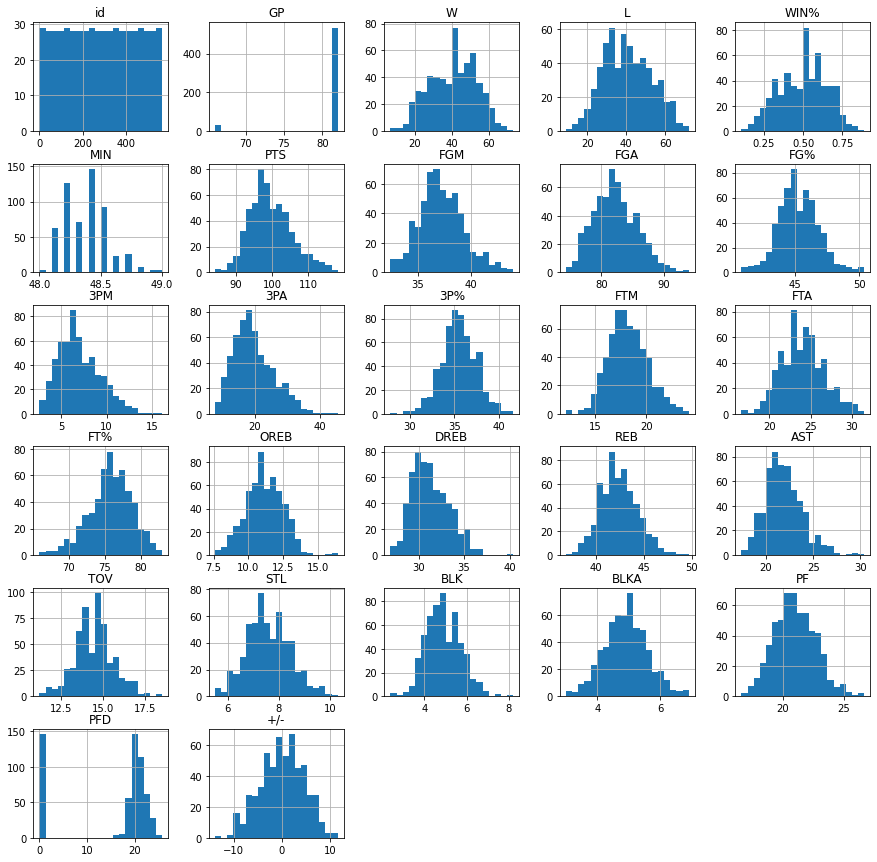

In [98]:
team.hist(figsize=(15,15),bins=20)

<AxesSubplot:title={'center':'Foreign NBA players who played between 2019-20 by country'}>

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


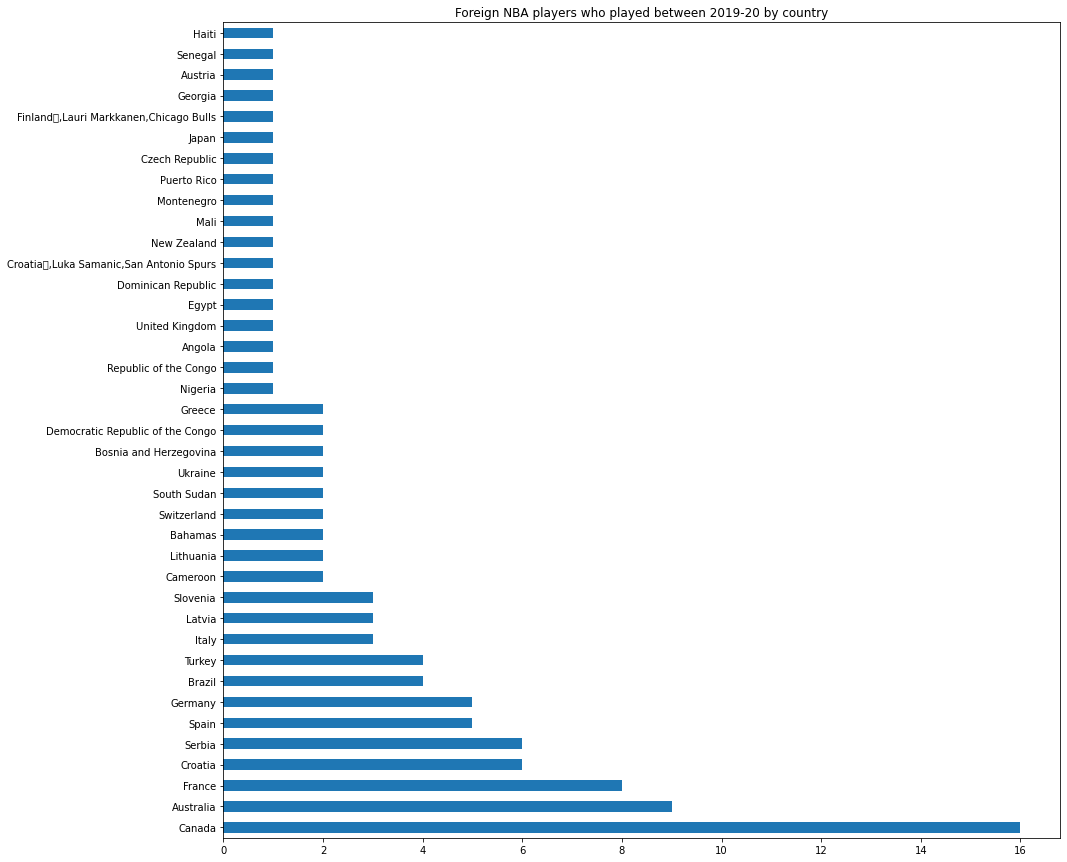

In [99]:
#Foreign NBA player numbers who played between 2019-2020 by country
plt.title("Foreign NBA players who played between 2019-20 by country")
foreign['COUNTRY'].value_counts().plot(kind='barh', figsize=(15,15))
#Comment
#Turkey, with Brazil, is the sixth country with the most foreign players.

<AxesSubplot:title={'center':'Foreign NBA players who played between 2019-20 by team'}>

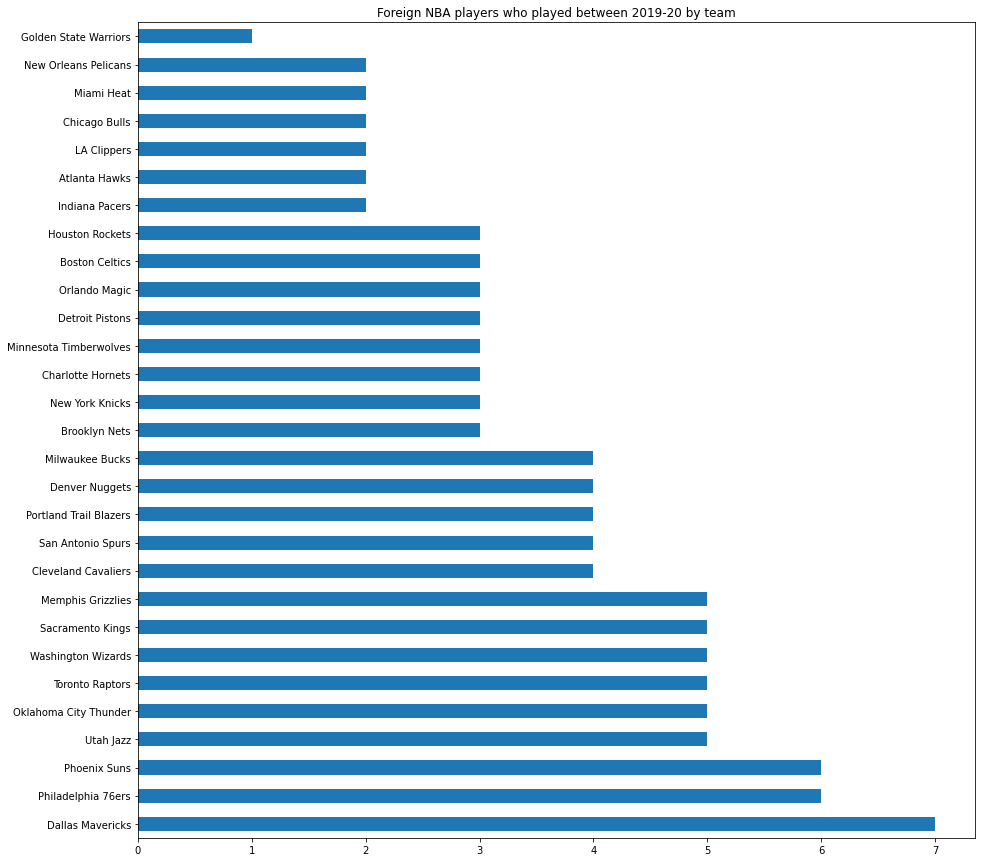

In [20]:
#Foreign NBA players who played between 2019-20 by team
plt.title("Foreign NBA players who played between 2019-20 by team")
foreign['team'].value_counts().plot(kind='barh', figsize=(15,15))

# Merge Two Datasets

In [21]:
#Merge foreign NBA players and NBA player stats
mergeFor = statsN.merge(foreign)
mergeFor

,Unnamed: 0,player,pos,age,tm,g,gs,mp,fg,fga,...,trb,ast,stl,blk,tov,pf,pts,year,COUNTRY,team
0,13096,Pau Gasol,PF,21,MEM,82,79.0,36.7,6.7,13.0,...,8.9,2.7,0.5,2.1,2.7,2.4,17.6,2001-02,Spain,Portland Trail Blazers
1,13522,Pau Gasol,PF,22,MEM,82,82.0,36.0,6.9,13.6,...,8.8,2.8,0.4,1.8,2.6,2.7,19.0,2002-03,Spain,Portland Trail Blazers
2,13962,Pau Gasol,PF,23,MEM,78,78.0,31.5,6.5,13.4,...,7.7,2.5,0.6,1.7,2.4,2.4,17.7,2003-04,Spain,Portland Trail Blazers
3,14409,Pau Gasol,PF,24,MEM,56,53.0,32.0,6.4,12.4,...,7.3,2.4,0.7,1.7,2.4,2.6,17.8,2004-05,Spain,Portland Trail Blazers
4,14866,Pau Gasol,PF,25,MEM,80,80.0,39.2,7.5,14.9,...,8.9,4.6,0.6,1.9,2.9,2.3,20.4,2005-06,Spain,Portland Trail Blazers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,21575,Rui Hachimura,PF,21,WAS,48,48.0,30.1,5.3,11.4,...,6.1,1.8,0.8,0.2,1.1,2.2,13.5,2019-20,Japan,Washington Wizards
501,21649,Mfiondu Kabengele,C,22,LAC,12,NaN,5.3,1.2,2.7,...,0.9,0.2,0.2,0.2,0.2,0.8,3.5,2019-20,Canada,LA Clippers
502,21786,Vincent Poirier,C,26,BOS,22,NaN,5.9,0.8,1.6,...,2.0,0.4,0.1,0.4,0.4,1.1,1.9,2019-20,France,Boston Celtics
503,21835,Alen Smailagic,C,19,GSW,14,NaN,9.9,1.4,2.9,...,1.9,0.9,0.2,0.3,0.8,1.0,4.2,2019-20,Serbia,Golden State Warriors


In [22]:
mergeFor.columns

Index(['Unnamed: 0', 'player', 'pos', 'age', 'tm', 'g', 'gs', 'mp', 'fg',
       'fga', 'fgpercent', 'p3', 'pa3', 'p3percent', 'p2', 'pa2', 'p2percent',
       'efgpercent', 'ft', 'fta', 'ftpercent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'year', 'COUNTRY', 'team'],
      dtype='object')

In [23]:
mergeFor.describe()

,Unnamed: 0,age,g,gs,mp,fg,fga,fgpercent,p3,pa3,...,ftpercent,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,505.000000,505.000000,505.000000,447.000000,505.000000,503.000000,505.000000,503.000000,363.000000,412.000000,...,499.000000,501.000000,504.000000,504.000000,500.000000,496.000000,467.000000,503.000000,504.000000,503.000000
mean,19759.457426,24.881188,61.956436,38.984340,23.019208,3.813320,7.984950,0.475505,1.024518,2.533738,...,0.747601,1.298204,3.618254,4.908333,2.149800,0.682661,0.661242,1.387674,2.057143,10.183698
std,1747.241111,3.888544,19.085181,28.645228,8.557808,2.072165,4.235204,0.074169,0.675809,1.841216,...,0.108798,0.963295,1.992537,2.783280,1.772553,0.365731,0.578307,0.747644,0.697673,5.588058
min,13096.000000,19.000000,1.000000,1.000000,1.000000,0.200000,1.000000,0.083000,0.100000,0.100000,...,0.174000,0.100000,0.100000,0.200000,0.100000,0.100000,0.100000,0.100000,0.300000,0.500000
25%,18888.000000,22.000000,53.000000,10.000000,16.600000,2.100000,4.500000,0.427000,0.500000,1.000000,...,0.689000,0.500000,2.175000,2.800000,0.900000,0.400000,0.200000,0.800000,1.600000,5.700000
50%,20189.000000,24.000000,67.000000,37.000000,23.400000,3.400000,7.500000,0.466000,0.900000,2.300000,...,0.764000,1.000000,3.200000,4.400000,1.600000,0.600000,0.500000,1.300000,2.100000,9.300000
75%,21129.000000,27.000000,77.000000,67.000000,30.800000,5.200000,10.600000,0.519500,1.400000,3.700000,...,0.823500,1.900000,4.800000,6.700000,3.000000,0.900000,0.900000,1.800000,2.600000,13.900000
max,21911.000000,38.000000,82.000000,82.000000,39.200000,10.900000,20.800000,0.750000,3.800000,9.600000,...,1.000000,5.100000,11.400000,13.800000,9.100000,2.400000,3.700000,4.300000,3.800000,29.500000


In [24]:
np.unique(mergeFor['COUNTRY'])
#Countries of the players playing in NBA

array(['Angola', 'Australia', 'Austria', 'Bahamas', 'Brazil', 'Cameroon',
       'Canada', 'Croatia', 'Democratic Republic of the Congo',
       'Dominican Republic', 'Egypt', 'France', 'Georgia', 'Germany',
       'Greece', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Mali',
       'New Zealand', 'Nigeria', 'Puerto Rico', 'Republic of the Congo',
       'Senegal', 'Serbia', 'Slovenia', 'South Sudan', 'Spain',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'], dtype=object)

In [25]:
#Here I found ot which team the foreign players played in.
print(mergeFor[mergeFor["COUNTRY"]=="Angola"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Australia"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Austria"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Bahamas"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Brazil"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Cameroon"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Canada"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Croatia"][["player","tm"]])
print(mergeFor[mergeFor["COUNTRY"]=="Democratic Republic of the Congo"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Dominican Republic"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Egypt"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="France"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Georgia"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Germany"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Greece"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Italy"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Japan"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Latvia"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Lithuania"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Mali"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="New Zealand"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Nigeria"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Republic of the Congo"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Senegal"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Serbia"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="South Sudan"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Spain"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Switzerland"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Turkey"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="Ukraine"][["player","tm","year"]])
print(mergeFor[mergeFor["COUNTRY"]=="United Kingdom"][["player","tm","year"]])

             player   tm     year
497  Bruno Fernando  ATL  2019-20
                  player   tm     year
159          Patty Mills  POR  2009-10
160          Patty Mills  POR  2010-11
161          Patty Mills  SAS  2011-12
162          Patty Mills  SAS  2012-13
163          Patty Mills  SAS  2013-14
164          Patty Mills  SAS  2014-15
165          Patty Mills  SAS  2015-16
166          Patty Mills  SAS  2016-17
167          Patty Mills  SAS  2017-18
168          Patty Mills  SAS  2018-19
169          Patty Mills  SAS  2019-20
179         Kyrie Irving  CLE  2011-12
180         Kyrie Irving  CLE  2012-13
181         Kyrie Irving  CLE  2013-14
182         Kyrie Irving  CLE  2014-15
183         Kyrie Irving  CLE  2015-16
184         Kyrie Irving  CLE  2016-17
185         Kyrie Irving  BOS  2017-18
186         Kyrie Irving  BOS  2018-19
187         Kyrie Irving  BRK  2019-20
224          Aron Baynes  SAS  2012-13
225          Aron Baynes  SAS  2013-14
226          Aron Baynes  SAS  2014

In [26]:
#Here I have shown the names of the players whose country is Turkey, 
#in which years they played and how many points they played with average.
mergeFor[mergeFor["COUNTRY"]=="Turkey"][["player","pts","year"]]

,player,pts,year
49,Ersan Ilyasova,6.1,2006-07
50,Ersan Ilyasova,10.4,2009-10
51,Ersan Ilyasova,9.5,2010-11
52,Ersan Ilyasova,13.0,2011-12
53,Ersan Ilyasova,13.2,2012-13
54,Ersan Ilyasova,11.2,2013-14
55,Ersan Ilyasova,11.5,2014-15
56,Ersan Ilyasova,10.4,2015-16
57,Ersan Ilyasova,13.1,2016-17
58,Ersan Ilyasova,10.9,2017-18


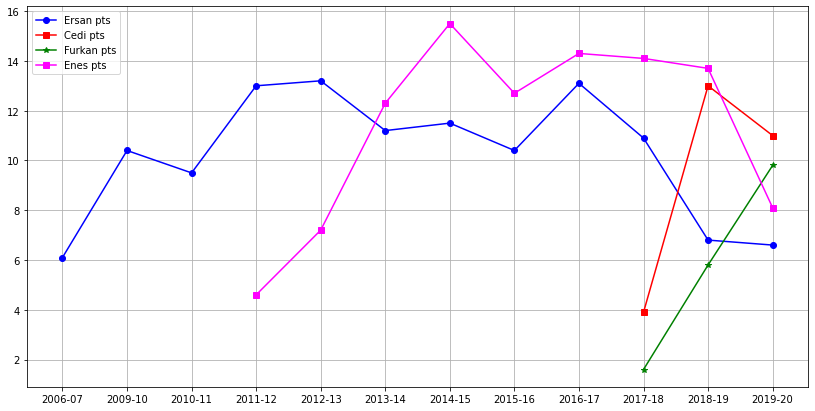

In [27]:
plt.figure(figsize=(14,7))
plt.grid()
plt.plot(mergeFor[mergeFor["player"]=="Ersan Ilyasova"].year,mergeFor[mergeFor["player"]=="Ersan Ilyasova"].pts,color="blue",marker="o",label="Ersan pts")
plt.plot(mergeFor[mergeFor["player"]=="Cedi Osman"].year,mergeFor[mergeFor["player"]=="Cedi Osman"].pts,color="red",marker="s",label="Cedi pts")
plt.plot(mergeFor[mergeFor["player"]=="Furkan Korkmaz"].year,mergeFor[mergeFor["player"]=="Furkan Korkmaz"].pts,color="green",marker="*",label="Furkan pts")
plt.plot(mergeFor[mergeFor["player"]=="Enes Kanter"].year,mergeFor[mergeFor["player"]=="Enes Kanter"].pts,color="magenta",marker="s",label="Enes pts")
plt.legend(loc=2)

In [28]:
#I calculated the average of the points Turkish players scored during the seasons they played.
#Then I stated the Turkish player with the highest average.
ersan = mergeFor[mergeFor["player"]=="Ersan Ilyasova"].mean().pts
print("Ersan avg point",ersan)
enes = mergeFor[mergeFor["player"]=="Enes Kanter"].mean().pts
print("Enes avg point",enes)
furkan = mergeFor[mergeFor["player"]=="Furkan Korkmaz"].mean().pts
print("Furkan avg point",furkan)
cedi = mergeFor[mergeFor["player"]=="Cedi Osman"].mean().pts
print("Cedi avg point",cedi)
print("Enes is the Turkish player with highest average score in NBA")

Ersan avg point 10.225
Enes avg point 11.388888888888888
Furkan avg point 5.733333333333334
Cedi avg point 9.299999999999999
Enes is the Turkish player with highest average score in NBA


(10.225, 11.388888888888888, 9.299999999999999, 5.733333333333334)


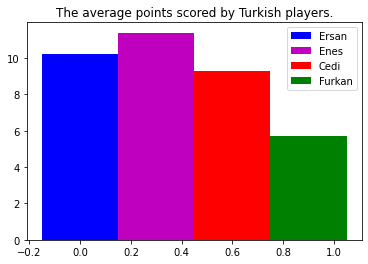

In [29]:
#The average points scored by Turkish players.
positions = np.array([0])
width = 0.3
values = (ersan,enes,cedi,furkan)
print(values)
plt.title("The average points scored by Turkish players.")
plt.bar(positions,ersan,width,color="b",label="Ersan")
plt.bar(positions+width,enes,width,color="m",label="Enes")
plt.bar(positions+(2*width),cedi,width,color="r",label="Cedi")
plt.bar(positions+(3*width),furkan,width,color="g",label="Furkan")
plt.legend(loc=1)

In [30]:
#I found the foreign player who scored the most average points.
#Then I show the stats this player
ptsMax = np.max(mergeFor[mergeFor["year"]=="2019-20"].pts)
print(ptsMax)
whoP = mergeFor[mergeFor["pts"]==29.5].player
print(whoP)

29.5
253    Giannis Antetokounmpo
Name: player, dtype: object


In [31]:
mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"]

,Unnamed: 0,player,pos,age,tm,g,gs,mp,fg,fga,...,trb,ast,stl,blk,tov,pf,pts,year,COUNTRY,team
247,18393,Giannis Antetokounmpo,SF,19,MIL,77,23.0,24.6,2.2,5.4,...,4.4,1.9,0.8,0.8,1.6,2.2,6.8,2013-14,Greece,Milwaukee Bucks
248,18876,Giannis Antetokounmpo,SG,20,MIL,81,71.0,31.4,4.7,9.6,...,6.7,2.6,0.9,1.0,2.1,3.1,12.7,2014-15,Greece,Milwaukee Bucks
249,19369,Giannis Antetokounmpo,PG,21,MIL,80,79.0,35.3,6.4,12.7,...,7.7,4.3,1.2,1.4,2.6,3.2,16.9,2015-16,Greece,Milwaukee Bucks
250,19842,Giannis Antetokounmpo,SF,22,MIL,80,80.0,35.6,8.2,15.7,...,8.8,5.4,1.6,1.9,2.9,3.1,22.9,2016-17,Greece,Milwaukee Bucks
251,20328,Giannis Antetokounmpo,PF,23,MIL,75,75.0,36.7,9.9,18.7,...,10.0,4.8,1.5,1.4,3.0,3.1,26.9,2017-18,Greece,Milwaukee Bucks
252,20870,Giannis Antetokounmpo,PF,24,MIL,72,72.0,32.8,10.0,17.3,...,12.5,5.9,1.3,1.5,3.7,3.2,27.7,2018-19,Greece,Milwaukee Bucks
253,21395,Giannis Antetokounmpo,PF,25,MIL,63,63.0,30.4,10.9,19.7,...,13.6,5.6,1.0,1.0,3.7,3.1,29.5,2019-20,Greece,Milwaukee Bucks


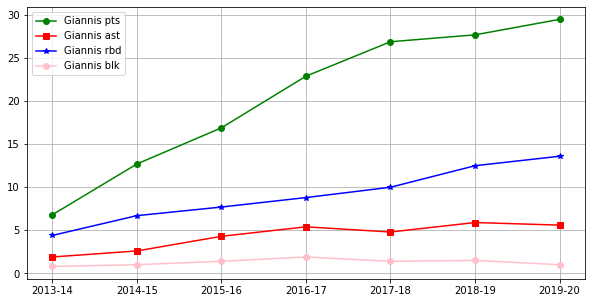

In [32]:
plt.figure(figsize=(10,5))
plt.plot(mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"].year,mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"].pts
         ,color="green",marker="o",label="Giannis pts")
plt.plot(mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"].year,mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"].ast
         ,color="red",marker="s",label="Giannis ast")
plt.plot(mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"].year,mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"].trb
         ,color="blue",marker="*",label="Giannis rbd")
plt.plot(mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"].year,mergeFor[mergeFor["player"]=="Giannis Antetokounmpo"].blk
         ,color="pink",marker="o",label="Giannis blk")
plt.grid()
plt.legend(loc=2)

# Hypothesis and Questions

# Hypothesis1 Is German Player has more average points than Turkish player?

In [33]:
TurkishPpts = mergeFor[(mergeFor["COUNTRY"]=="Turkey") & (mergeFor["year"]=="2019-20")].pts.mean()
print(TurkishPpts)
GermanPpts = mergeFor[(mergeFor["COUNTRY"]=="Germany") & (mergeFor["year"]=="2019-20")].pts.mean()
print(GermanPpts)
print("Yes German player average points is bigger than Turkish player")

8.875
10.180000000000001
Yes German player average points is bigger than Turkish player


In [34]:
print(stats.shapiro(mergeFor[(mergeFor["COUNTRY"]=="Turkey") & (mergeFor["year"]=="2019-20")].pts))
print(stats.shapiro(mergeFor[(mergeFor["COUNTRY"]=="Germany") & (mergeFor["year"]=="2019-20")].pts))
print(stats.ttest_ind(mergeFor[(mergeFor["COUNTRY"]=="Germany") & (mergeFor["year"]=="2019-20")].pts, mergeFor[(mergeFor["COUNTRY"]=="Turkey") & (mergeFor["year"]=="2019-20")].pts, equal_var=True))
#My shapiro values show that p values is bigger than 0.05.
#Then I can say that since my p value is greater than 0.05, it has a normal distribution.
#Also my ttest p values is bigger 0.05
#I can accept the null hypothesis.

ShapiroResult(statistic=0.9808921217918396, pvalue=0.9072325825691223)
ShapiroResult(statistic=0.8171995878219604, pvalue=0.11107854545116425)
Ttest_indResult(statistic=0.4731466284348582, pvalue=0.6505074958158032)


# Does Foreign player has effect on team?

Text(0.5, 1.0, '2018-2019 number of NBA foreign players')

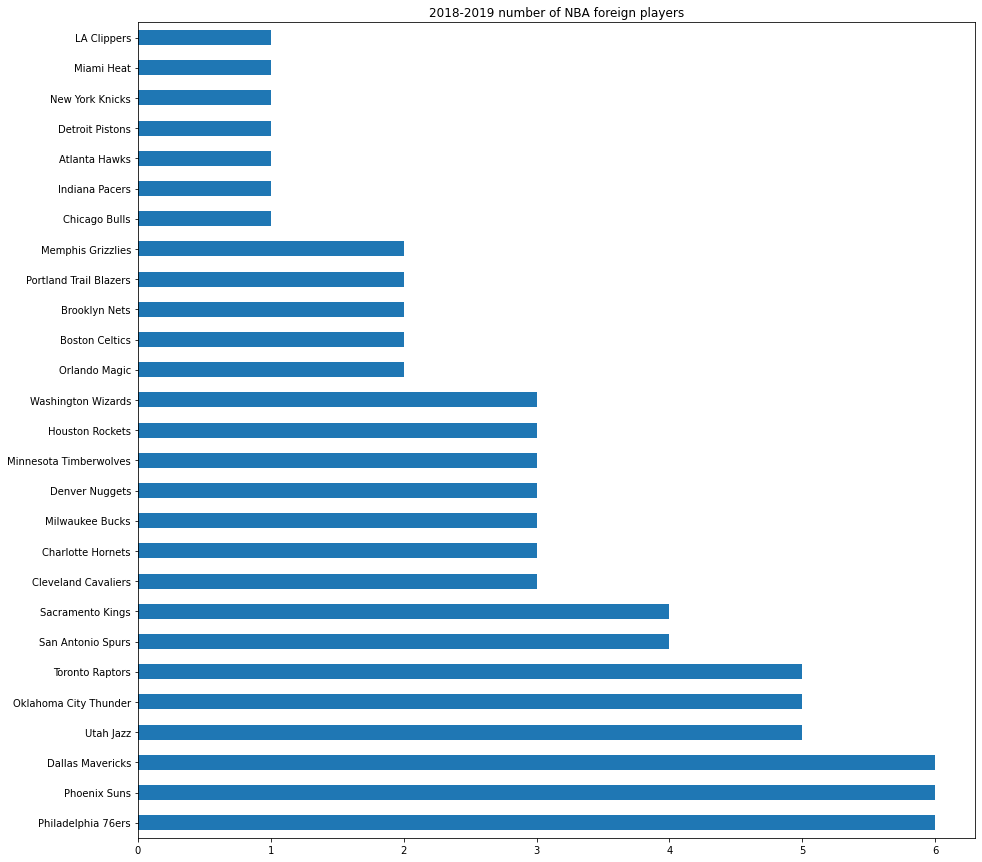

In [35]:
##Foreign NBA players who played between 2018-19 by team
mergeFor[mergeFor['year']=="2018-19"]["team"].value_counts().plot(kind='barh', figsize=(15,15))
plt.title("2018-2019 number of NBA foreign players")

In [36]:
#Philadelphia has most foreign player team
philadelphiaP = mergeFor[(mergeFor["team"]=="Philadelphia 76ers") & (mergeFor["year"]=="2018-19")][["player","pts"]]
print(philadelphiaP)
#Atlanta has least foreign player team
atlantaP = mergeFor[(mergeFor["team"]=="Atlanta Hawks") & (mergeFor["year"]=="2018-19")][["player","pts"]]
print(atlantaP)

             player   pts
99       Al Horford  13.6
377       Raul Neto   5.3
393     Joel Embiid  27.5
454  Furkan Korkmaz   5.8
466     Ben Simmons  16.9
473    Jonah Bolden   4.7
       player   pts
280  Alex Len  11.1


In [37]:
#The team that played the most foreign players in the 2018-2019 season. 
#Average points scored by the foreign players of this team.
#I also showed the number of victories and losses of these teams during that season.
philadelphia = mergeFor[(mergeFor["team"]=="Philadelphia 76ers") & (mergeFor["year"]=="2019-20")].pts.mean()
print("The team that played the most foreign players in the 2019-2020 season",philadelphia)
atlanta = mergeFor[(mergeFor["team"]=="Atlanta Hawks") & (mergeFor["year"]=="2019-20")].pts.mean()
print("The team that playes the least foreign player in the 2019-2020 season",atlanta)
phiWin = team[(team["TEAM"]=="Philadelphia 76ers") & (team["SEASON"]=="2018-19")][["W","L","PTS"]]
print(phiWin)
atlantaWin = team[(team["TEAM"]=="Atlanta Hawks") & (team["SEASON"]=="2018-19")][["W","L","PTS"]]
print(atlantaWin)
#One of the conclusions drawn from this is that the average of the points scored by foreign players is not much.
#But the winning effects are high.

The team that played the most foreign players in the 2019-2020 season 11.266666666666666
The team that playes the least foreign player in the 2019-2020 season 6.15
     W   L    PTS
22  51  31  115.2
    W   L    PTS
0  29  53  113.3


# 8 countries with the most foreign players and the numbers scored by the players in these countries

In [38]:
CanadaP = mergeFor[(mergeFor["COUNTRY"]=="Canada") & (mergeFor["year"]=="2019-20")].player.count()
print("Canadian players num",CanadaP)
AustraliaP = mergeFor[(mergeFor["COUNTRY"]=="Australia") & (mergeFor["year"]=="2019-20")].player.count()
print("Australian players num",AustraliaP)
FranceP = mergeFor[(mergeFor["COUNTRY"]=="France") & (mergeFor["year"]=="2019-20")].player.count()
print("French players num",FranceP)
SerbiaP = mergeFor[(mergeFor["COUNTRY"]=="Serbia") & (mergeFor["year"]=="2019-20")].player.count()
print("Serb players num",SerbiaP)
TurkeyP = mergeFor[(mergeFor["COUNTRY"]=="Turkey") & (mergeFor["year"]=="2019-20")].player.count()
print("Turkish players num",TurkeyP)
CroatiaP = mergeFor[(mergeFor["COUNTRY"]=="Croatia") & (mergeFor["year"]=="2019-20")].player.count()
print("Croatian players num",CroatiaP)
GermanyP = mergeFor[(mergeFor["COUNTRY"]=="Germany") & (mergeFor["year"]=="2019-20")].player.count()
print("German players num",GermanyP)
SpainP = mergeFor[(mergeFor["COUNTRY"]=="Spain") & (mergeFor["year"]=="2019-20")].player.count()
print("Spanish players num",SpainP)

Canadian players num 16
Australian players num 9
French players num 8
Serb players num 6
Turkish players num 4
Croatian players num 6
German players num 5
Spanish players num 4


In [39]:
#Top 8 countries with the most foreign players in the NBA and the average of the points scored by the players in that country.
Canada = mergeFor[(mergeFor["COUNTRY"]=="Canada") & (mergeFor["year"]=="2019-20")].pts.mean()
print("Average numbers scored by Canadian players =",Canada)
Australia = mergeFor[(mergeFor["COUNTRY"]=="Australia") & (mergeFor["year"]=="2019-20")].pts.mean()
print("Average numbers scored by Australian players =",Australia)
France = mergeFor[(mergeFor["COUNTRY"]=="France") & (mergeFor["year"]=="2019-20")].pts.mean()
print("Average numbers scored by French players =",France)
Serbia = mergeFor[(mergeFor["COUNTRY"]=="Serbia") & (mergeFor["year"]=="2019-20")].pts.mean()
print("Average numbers scored by Serb players =",Serbia)
Turkey = mergeFor[(mergeFor["COUNTRY"]=="Turkey") & (mergeFor["year"]=="2019-20")].pts.mean()
print("Average numbers scored by Turkish players =",Turkey)
Croatia = mergeFor[(mergeFor["COUNTRY"]=="Croatia") & (mergeFor["year"]=="2019-20")].pts.mean()
print("Average numbers scored by Croatian players =",Croatia)
Germany = mergeFor[(mergeFor["COUNTRY"]=="Germany") & (mergeFor["year"]=="2019-20")].pts.mean()
print("Average numbers scored by German players =",Germany)
Spain =mergeFor[(mergeFor["COUNTRY"]=="Spain") & (mergeFor["year"]=="2019-20")].pts.mean()
print("Average numbers scored by Spanish players =",Spain)

Average numbers scored by Canadian players = 10.4
Average numbers scored by Australian players = 9.98888888888889
Average numbers scored by French players = 7.8999999999999995
Average numbers scored by Serb players = 10.200000000000001
Average numbers scored by Turkish players = 8.875
Average numbers scored by Croatian players = 9.183333333333334
Average numbers scored by German players = 10.180000000000001
Average numbers scored by Spanish players = 8.15


(10.4, 9.98888888888889, 7.8999999999999995, 10.200000000000001, 8.875, 9.183333333333334, 10.180000000000001, 8.15)


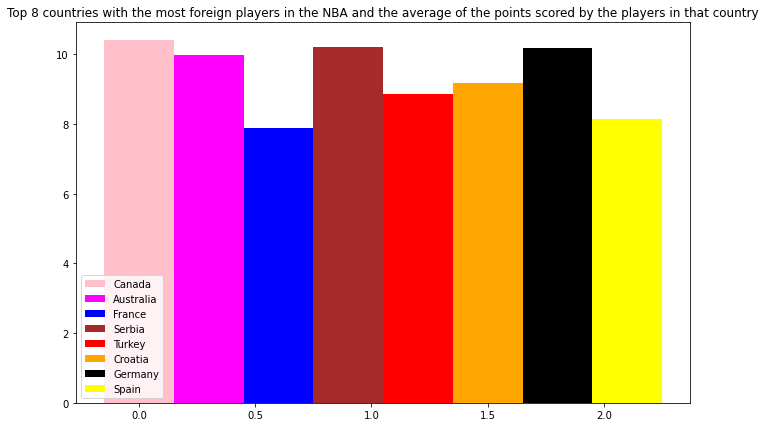

In [40]:
positions = np.array([0])
width = 0.3
cValues = (Canada,Australia,France,Serbia,Turkey,Croatia,Germany,Spain)
print(cValues)
plt.figure(figsize=(11,7))
plt.title("Top 8 countries with the most foreign players in the NBA and the average of the points scored by the players in that country")
plt.bar(positions,Canada,width,color="pink",label="Canada")
plt.bar(positions+width,Australia,width,color="magenta",label="Australia")
plt.bar(positions+(2*width),France,width,color="blue",label="France")
plt.bar(positions+(3*width),Serbia,width,color="brown",label="Serbia")
plt.bar(positions+(4*width),Turkey,width,color="red",label="Turkey")
plt.bar(positions+(5*width),Croatia,width,color="orange",label="Croatia")
plt.bar(positions+(6*width),Germany,width,color="black",label="Germany")
plt.bar(positions+(7*width),Spain,width,color="yellow",label="Spain")
plt.legend(loc=3)
#Spanish players have the most average points.

# Hypothesis2 Is players who aged over 27 mean points higher than the players who aged below 27 where both group of players have 3 points % above 0.4?

In [41]:
overAgePts = statsN[(statsN["p3percent"]>0.4) & (statsN["age"]>27)].mean().pts
underAgePts = statsN[(statsN["p3percent"]>0.4) & (statsN["age"]<27)].mean().pts
print("Over age 27 and 3p% over 0.4 =",overAgePts)
print("Under age 27 and 3p% over 0.4 =",underAgePts)
#COMMENT
#in my csv file define 3p% but i cannot use and I change the name p3percent

Over age 27 and 3p% over 0.4 = 9.593846153846158
Under age 27 and 3p% over 0.4 = 8.580253164556956


In [42]:
print(stats.ttest_ind(statsN[(statsN["p3percent"]>0.4) & (statsN["age"]>27)].pts, statsN[(statsN["p3percent"]>0.4) & (statsN["age"]<27)].pts, equal_var=True))
print(stats.shapiro(statsN[(statsN["p3percent"]>0.4) & (statsN["age"]>27)].pts))
print(stats.shapiro(statsN[(statsN["p3percent"]>0.4) & (statsN["age"]<27)].pts))
#COMMENT
#My shapiro values show that p values is smallest than 0.05.
#Then I can say that since my p value is smallest than 0.05, it has not a normal distribution.
#Also my ttest p values is smallest 0.05
#I reject the null hypothesis.
#there is a significant difference between

Ttest_indResult(statistic=3.351664680355753, pvalue=0.000822375793108697)
ShapiroResult(statistic=0.9365009665489197, pvalue=1.0308585355528785e-17)
ShapiroResult(statistic=0.9095655679702759, pvalue=2.989996391211896e-21)


# Hypothesis3 Is the total number of winning teams over 50 games more than the number of winning teams under 50 games?

In [43]:
overWcount = team[team["W"]>50].count().TEAM
print("count over 50wins=",overWcount)
underWcount = team[team["W"]<50].count().TEAM
print("count under 50wins=",underWcount)

count over 50wins= 125
count under 50wins= 416


In [44]:
print("ttest for 50 win", stats.ttest_ind(team[team["W"]<50].W, team[team["W"]>50].W, equal_var=True))
print("Shapiro under 50win=",stats.shapiro(team[team["W"]<50].W))
print("Shapiro over 50win=",stats.shapiro(team[team["W"]>50].W))
#COMMENT
#My shapiro values show that p values is smallest than 0.05.
#Then I can say that since my p value is smallest than 0.05, it has not a normal distribution.
#Also my ttest p values is smallest 0.05
#I reject the null hypothesis.
#there is a significant difference between

ttest for 50 win Ttest_indResult(statistic=-24.69969358826637, pvalue=1.1803730204062906e-90)
Shapiro under 50win= ShapiroResult(statistic=0.9562259912490845, pvalue=8.867399592382696e-10)
Shapiro over 50win= ShapiroResult(statistic=0.9250621199607849, pvalue=3.189122708135983e-06)


# Hypothesis4 Is Los Angeles Lakers (LAL) better than Los Angeles Clippers (LAC) in avg win in all seasons?

In [45]:
LALratio = team[team["TEAM"]=="Los Angeles Lakers"].mean().W
LACratio = team[team["TEAM"]=="Los Angeles Clippers"].mean().W
print("Los Angeles Lakers avg W",LALratio)
print("Los Angeles Clippers avg W",LACratio)
#COMMENT
print("LAL is better than LAC in avg win in all seasons")

Los Angeles Lakers avg W 43.473684210526315
Los Angeles Clippers avg W 37.4
LAL is better than LAC in avg win in all seasons


In [46]:
print("For LAL shapiro test")
print(stats.shapiro(team[team["TEAM"]=="Los Angeles Lakers"].W))
print("For LAC shapiro test")
print(stats.shapiro(team[team["TEAM"]=="Los Angeles Clippers"].W))
print(stats.ttest_ind(team[team["TEAM"]=="Los Angeles Lakers"].W, 
                      team[team["TEAM"]=="Los Angeles Clippers"].W, equal_var=True))
#COMMENT
#My shapiro values show that p values is bigger than 0.05.
#Then I can say that since my p value is bigger than 0.05, it has a normal distribution.
#Also my ttest p values is bigger 0.05
#I can accept the null hypothesis.

For LAL shapiro test
ShapiroResult(statistic=0.9402321577072144, pvalue=0.2662448585033417)
For LAC shapiro test
ShapiroResult(statistic=0.9306820631027222, pvalue=0.27935105562210083)
Ttest_indResult(statistic=1.3238134124911844, pvalue=0.194944590656113)


# Is LeBron James have better than Carmelo Anthony in avg points in all seasons?

In [47]:
Lbj = statsN[statsN["player"]=="LeBron James"].mean().pts
Melo = statsN[statsN["player"]=="Carmelo Anthony"].mean().pts
print(Lbj)
print(Melo)
#COMMENT
print("LeBron James is better than Carmelo Anthony in avg points in all seasons")

27.04705882352941
23.03529411764705
LeBron James is better than Carmelo Anthony in avg points in all seasons


In [48]:
print("For LeBron James shapiro test")
print(stats.shapiro(statsN[statsN["player"]=="LeBron James"].pts))
print("For Carmelo Anthony shapiro test")
print(stats.shapiro(statsN[statsN["player"]=="Carmelo Anthony"].pts))
print(stats.ttest_ind(statsN[statsN["player"]=="LeBron James"].pts, 
                     statsN[statsN["player"]=="Carmelo Anthony"].pts, equal_var=True))
#COMMENT
#My shapiro values show that p values is bigger than 0.05.
#Then I can say that since my p value is bigger than 0.05, it has a normal distribution.
#But my ttest p values is smallest 0.05
#I reject the null hypothesis.
#there is a significant difference between
#I demonstrated this with ttest.

For LeBron James shapiro test
ShapiroResult(statistic=0.9106680154800415, pvalue=0.10267075151205063)
For Carmelo Anthony shapiro test
ShapiroResult(statistic=0.926985502243042, pvalue=0.19372344017028809)
Ttest_indResult(statistic=3.179914846067833, pvalue=0.0032635843202955105)


# Questions	Does a player have an impact on the team he plays for as a victory?

In [49]:
#Golden state warriors stats
team[team["TEAM"]=="Golden State Warriors"]

,id,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
9,9,Golden State Warriors,82,57,25,0.695,48.3,117.7,44.0,89.8,...,46.2,29.4,14.3,7.6,6.4,3.6,21.4,19.5,6.5,2018-19
39,39,Golden State Warriors,82,58,24,0.707,48.1,113.5,42.8,85.1,...,43.5,29.3,15.4,8.0,7.5,3.7,19.6,18.5,6.0,2017-18
69,69,Golden State Warriors,82,67,15,0.817,48.2,115.9,43.1,87.1,...,44.4,30.4,14.8,9.6,6.8,3.8,19.3,19.4,11.6,2016-17
99,99,Golden State Warriors,82,73,9,0.890,48.5,114.9,42.5,87.3,...,46.2,28.9,15.2,8.4,6.1,4.1,20.7,19.8,10.8,2015-16
129,129,Golden State Warriors,82,67,15,0.817,48.1,110.0,41.6,87.0,...,44.7,27.4,14.5,9.3,6.0,3.6,19.9,18.8,10.1,2014-15
159,159,Golden State Warriors,82,51,31,0.622,48.4,104.3,39.5,85.4,...,45.3,23.3,15.2,7.8,5.0,4.2,21.8,19.3,4.8,2013-14
189,189,Golden State Warriors,82,47,35,0.573,48.3,101.2,38.2,83.4,...,45.0,22.5,15.1,6.9,4.2,4.9,21.4,19.2,0.9,2012-13
218,218,Golden State Warriors,66,23,43,0.348,48.2,97.8,37.7,82.5,...,39.2,22.3,13.9,8.0,5.5,5.0,21.4,16.6,-3.4,2011-12
248,248,Golden State Warriors,82,36,46,0.439,48.4,103.4,39.6,85.9,...,40.5,22.5,14.6,9.0,5.0,4.3,22.0,18.4,-2.3,2010-11
278,278,Golden State Warriors,82,26,56,0.317,48.1,108.8,40.6,86.5,...,38.4,22.4,14.7,9.3,4.1,5.0,23.0,21.4,-3.6,2009-10


In [50]:
#Stephen Curry stats.
statsN[statsN["player"]=="Stephen Curry"]

,Unnamed: 0,player,pos,age,tm,g,gs,mp,fg,fga,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
16595,16635,Stephen Curry,PG,21,GSW,80,77.0,36.2,6.6,14.3,...,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5,2009-10
17038,17079,Stephen Curry,PG,22,GSW,74,74.0,33.6,6.8,14.2,...,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6,2010-11
17487,17531,Stephen Curry,PG,23,GSW,26,23.0,28.2,5.6,11.4,...,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7,2011-12
17959,18004,Stephen Curry,PG,24,GSW,78,78.0,38.2,8.0,17.8,...,0.8,3.3,4.0,6.9,1.6,0.2,3.1,2.5,22.9,2012-13
18440,18487,Stephen Curry,PG,25,GSW,78,78.0,36.5,8.4,17.7,...,0.6,3.7,4.3,8.5,1.6,0.2,3.8,2.5,24.0,2013-14
18921,18970,Stephen Curry,PG,26,GSW,80,80.0,32.7,8.2,16.8,...,0.7,3.6,4.3,7.7,2.0,0.2,3.1,2.0,23.8,2014-15
19405,19455,Stephen Curry,PG,27,GSW,79,79.0,34.2,10.2,20.2,...,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,2015-16
19873,19924,Stephen Curry,PG,28,GSW,79,79.0,33.4,8.5,18.3,...,0.8,3.7,4.5,6.6,1.8,0.2,3.0,2.3,25.3,2016-17
20380,20432,Stephen Curry,PG,29,GSW,51,51.0,32.0,8.4,16.9,...,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4,2017-18
20921,20976,Stephen Curry,PG,30,GSW,69,69.0,33.8,9.2,19.4,...,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,2018-19


In [51]:
#This information show that Golden State Warriors season and number of win matches
#Also show that Stephen Curry avg. point year by year
GSWseason = team[team["TEAM"]=="Golden State Warriors"][["SEASON","W"]]
Curryseason = statsN[statsN["player"]=="Stephen Curry"][["year","pts"]]
print(GSWseason[::-1])
print(Curryseason)

      SEASON   W
545  2000-01  17
516  2001-02  21
486  2002-03  38
457  2003-04  37
428  2004-05  34
398  2005-06  34
368  2006-07  42
338  2007-08  48
308  2008-09  29
278  2009-10  26
248  2010-11  36
218  2011-12  23
189  2012-13  47
159  2013-14  51
129  2014-15  67
99   2015-16  73
69   2016-17  67
39   2017-18  58
9    2018-19  57
          year   pts
16595  2009-10  17.5
17038  2010-11  18.6
17487  2011-12  14.7
17959  2012-13  22.9
18440  2013-14  24.0
18921  2014-15  23.8
19405  2015-16  30.1
19873  2016-17  25.3
20380  2017-18  26.4
20921  2018-19  27.3
21443  2019-20  20.8


In [52]:
#This information show that Stephen Curry avg. point year by year
curryPts = statsN[statsN["player"]=="Stephen Curry"][["pts"]]
currySeason = statsN[statsN["player"]=="Stephen Curry"][["year"]]
print(curryPts)
print(currySeason)

        pts
16595  17.5
17038  18.6
17487  14.7
17959  22.9
18440  24.0
18921  23.8
19405  30.1
19873  25.3
20380  26.4
20921  27.3
21443  20.8
          year
16595  2009-10
17038  2010-11
17487  2011-12
17959  2012-13
18440  2013-14
18921  2014-15
19405  2015-16
19873  2016-17
20380  2017-18
20921  2018-19
21443  2019-20


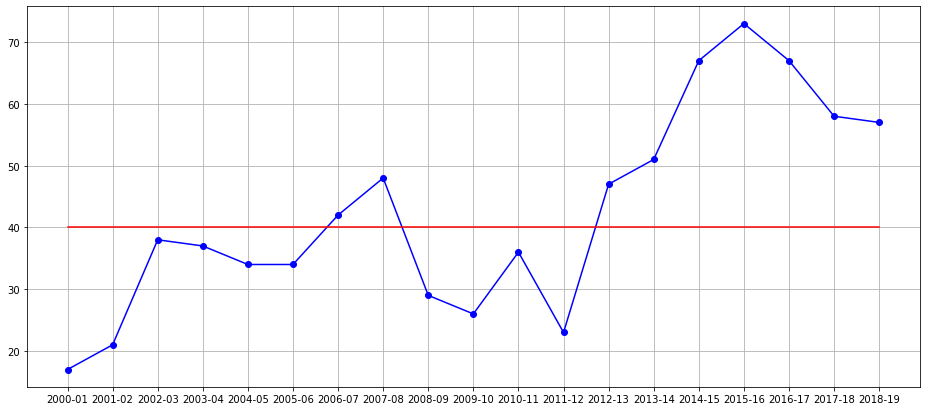

In [53]:
gswSeason = team[team["TEAM"]=="Golden State Warriors"].SEASON
gswWin = team[team["TEAM"]=="Golden State Warriors"].W
Win40 = np.linspace(40, 40, 19)
plt.figure(figsize=(16,7))
plt.grid()
plt.plot(gswSeason[::-1],gswWin[::-1],color="blue",marker="o")
plt.plot(gswSeason[::-1],Win40,color="red")

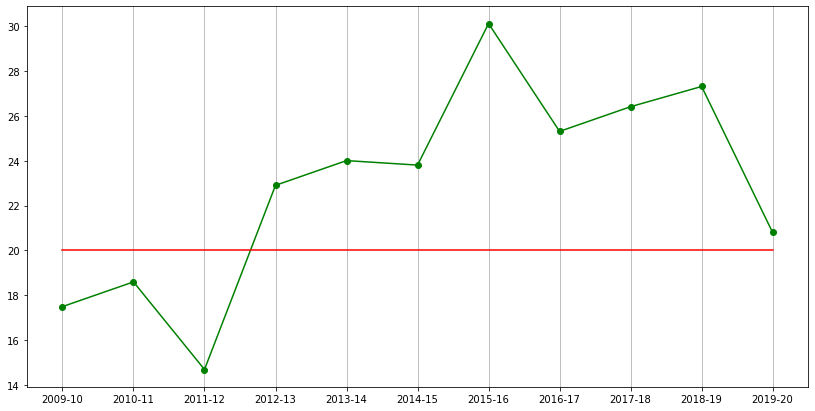

In [54]:
currySeason = statsN[statsN["player"]=="Stephen Curry"].year
curryPts = statsN[statsN["player"]=="Stephen Curry"].pts
Pts20 = np.linspace(20, 20, 11)
plt.figure(figsize=(14,7))
x = plt.axes()        
x.xaxis.grid() # vertical lines
plt.plot(currySeason,curryPts,color="green",marker="o")
plt.plot(currySeason,Pts20,color="red")

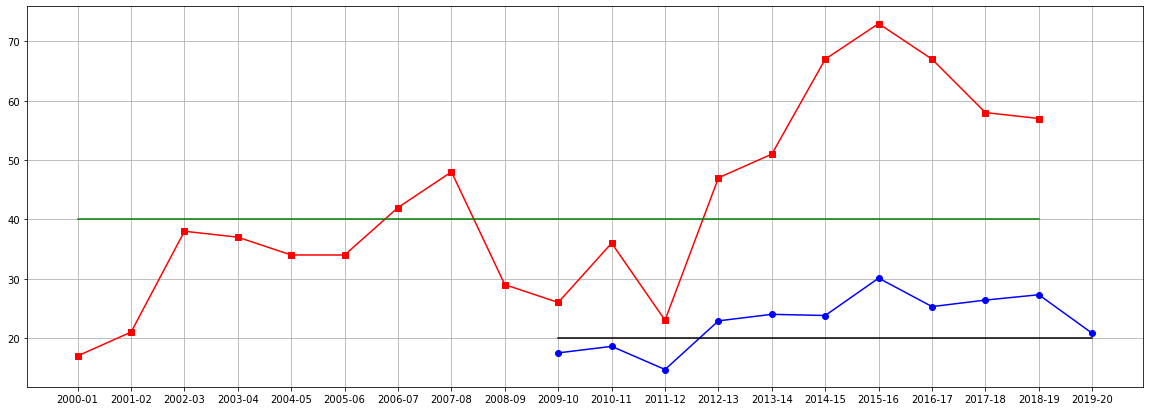

In [55]:
plt.figure(figsize=(20,7))
plt.plot(gswSeason[::-1],gswWin[::-1],color="red",marker="s")
plt.plot(currySeason,curryPts,color="blue",marker="o")
Win40 = np.linspace(40, 40, 19)
plt.plot(gswSeason[::-1],Win40,color="green")
plt.plot(currySeason,Pts20,color="black")
plt.grid()

In [56]:
curry = statsN[(statsN["player"]=="Stephen Curry") & (statsN["pts"]>20) & (statsN["g"]>5)].year
gsw = team[(team["TEAM"]=="Golden State Warriors") & (team["W"]>40)].SEASON
print(curry)
print(gsw)
#COMMNET
#We can say that some players have effect the teams.
print("Each season where Curry played 20 points above on average, Golden State won over 40 games.")

17959    2012-13
18440    2013-14
18921    2014-15
19405    2015-16
19873    2016-17
20380    2017-18
20921    2018-19
Name: year, dtype: object
9      2018-19
39     2017-18
69     2016-17
99     2015-16
129    2014-15
159    2013-14
189    2012-13
338    2007-08
368    2006-07
Name: SEASON, dtype: object
Each season where Curry played 20 points above on average, Golden State won over 40 games.


# Another example like Stephen Curry

In [57]:
#Cleveland Cavaliers Stats
team[team["TEAM"]=="Cleveland Cavaliers"]

,id,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
5,5,Cleveland Cavaliers,82,19,63,0.232,48.2,104.5,38.9,87.6,...,42.7,20.7,13.5,6.5,2.4,5.6,20.0,19.4,-9.6,2018-19
35,35,Cleveland Cavaliers,82,50,32,0.610,48.1,110.9,40.4,84.8,...,42.1,23.4,13.7,7.1,3.8,4.1,18.6,20.7,0.9,2017-18
65,65,Cleveland Cavaliers,82,51,31,0.622,48.5,110.3,39.9,84.9,...,43.7,22.7,13.7,6.6,4.0,4.3,18.1,20.6,3.2,2016-17
95,95,Cleveland Cavaliers,82,57,25,0.695,48.4,104.3,38.7,84.0,...,44.5,22.7,13.6,6.7,3.9,4.4,20.3,20.6,6.0,2015-16
125,125,Cleveland Cavaliers,82,53,29,0.646,48.2,103.1,37.7,82.2,...,43.0,22.1,14.3,7.4,4.1,4.5,18.4,20.5,4.5,2014-15
155,155,Cleveland Cavaliers,82,33,49,0.402,48.6,98.2,37.0,84.8,...,44.1,21.2,14.2,7.1,3.7,5.6,20.0,19.5,-3.3,2013-14
185,185,Cleveland Cavaliers,82,24,58,0.293,48.1,96.5,36.5,84.2,...,41.0,20.7,14.0,7.9,4.1,6.8,21.2,19.7,-4.7,2012-13
214,214,Cleveland Cavaliers,66,21,45,0.318,48.4,93.0,34.3,81.2,...,42.3,19.8,15.4,7.1,4.0,6.2,20.0,20.9,-7.2,2011-12
244,244,Cleveland Cavaliers,82,19,63,0.232,48.2,95.5,35.2,81.1,...,40.3,21.0,14.2,6.6,4.2,6.0,20.1,21.3,-9.0,2010-11
274,274,Cleveland Cavaliers,82,61,21,0.744,48.2,102.1,37.8,77.9,...,42.5,22.4,13.9,6.9,5.2,4.0,19.4,20.8,6.5,2009-10


In [58]:
#LeBron James stats
statsN[statsN["player"]=="LeBron James"]

,Unnamed: 0,player,pos,age,tm,g,gs,mp,fg,fga,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
13987,14020,LeBron James,SG,19,CLE,79,79.0,39.5,7.9,18.9,...,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,2003-04
14439,14474,LeBron James,SF,20,CLE,80,80.0,42.4,9.9,21.1,...,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,2004-05
14893,14930,LeBron James,SF,21,CLE,79,79.0,42.5,11.1,23.1,...,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,2005-06
15349,15388,LeBron James,SF,22,CLE,78,78.0,40.9,9.9,20.8,...,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,2006-07
15811,15850,LeBron James,SF,23,CLE,75,74.0,40.4,10.6,21.9,...,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,2007-08
16259,16298,LeBron James,SF,24,CLE,81,81.0,37.7,9.7,19.9,...,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4,2008-09
16717,16757,LeBron James,SF,25,CLE,76,76.0,39.0,10.1,20.1,...,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7,2009-10
17162,17203,LeBron James,SF,26,MIA,79,79.0,38.8,9.6,18.8,...,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7,2010-11
17618,17662,LeBron James,SF,27,MIA,62,62.0,37.5,10.0,18.9,...,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1,2011-12
18073,18119,LeBron James,PF,28,MIA,76,76.0,37.9,10.1,17.8,...,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8,2012-13


In [59]:
CLEseason = team[team["TEAM"]=="Cleveland Cavaliers"][["SEASON","W"]]
LeBronseason = statsN[(statsN["player"]=="LeBron James") & (statsN["tm"]=="CLE")][["year","pts"]]
print(CLEseason[::-1])
print(LeBronseason)

      SEASON   W
541  2000-01  30
512  2001-02  29
482  2002-03  17
453  2003-04  35
424  2004-05  42
394  2005-06  50
364  2006-07  50
334  2007-08  45
304  2008-09  66
274  2009-10  61
244  2010-11  19
214  2011-12  21
185  2012-13  24
155  2013-14  33
125  2014-15  53
95   2015-16  57
65   2016-17  51
35   2017-18  50
5    2018-19  19
          year   pts
13987  2003-04  20.9
14439  2004-05  27.2
14893  2005-06  31.4
15349  2006-07  27.3
15811  2007-08  30.0
16259  2008-09  28.4
16717  2009-10  29.7
19044  2014-15  25.3
19520  2015-16  25.3
19994  2016-17  26.4
20508  2017-18  27.5


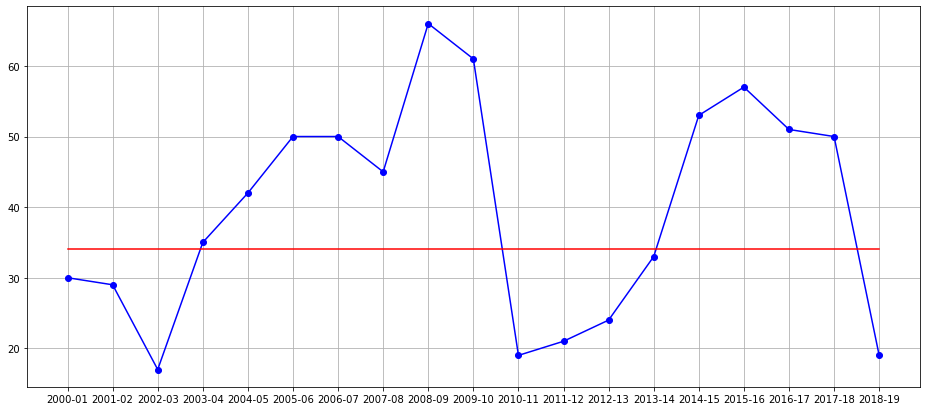

In [60]:
cleSeason = team[team["TEAM"]=="Cleveland Cavaliers"].SEASON
cleWin = team[team["TEAM"]=="Cleveland Cavaliers"].W
Win35 = np.linspace(34, 34, 19)
plt.figure(figsize=(16,7))
plt.grid()
plt.plot(cleSeason[::-1],cleWin[::-1],color="blue",marker="o")
plt.plot(cleSeason[::-1],Win35,color="red")

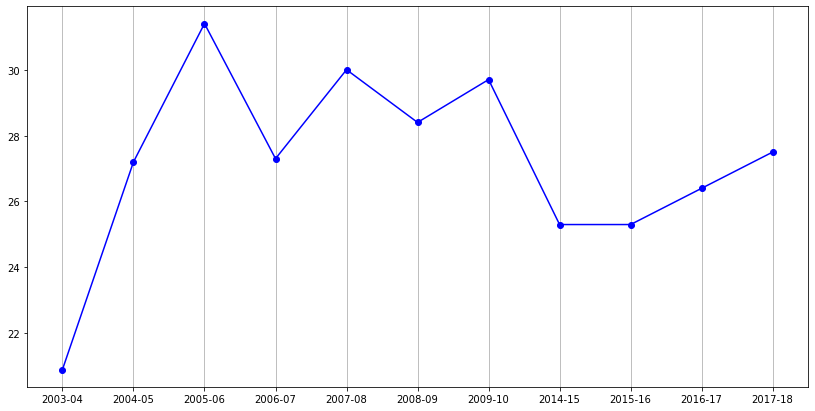

In [61]:
LeBronSeason = statsN[(statsN["player"]=="LeBron James") & (statsN["tm"]=="CLE")].year
LeBronPts = statsN[(statsN["player"]=="LeBron James") & (statsN["tm"]=="CLE")].pts
Pts20 = np.linspace(20, 20, 11)
plt.figure(figsize=(14,7))
x = plt.axes()        
x.xaxis.grid() # vertical lines
plt.plot(LeBronSeason,LeBronPts,color="blue",marker="o")

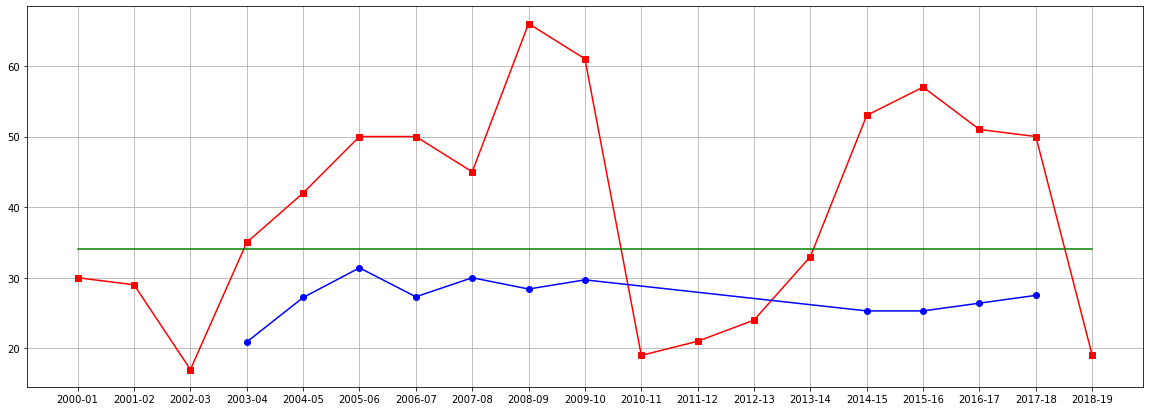

In [62]:
plt.figure(figsize=(20,7))
plt.plot(cleSeason[::-1],cleWin[::-1],color="red",marker="s")
plt.plot(LeBronSeason,LeBronPts,color="blue",marker="o")
Win35 = np.linspace(34, 34, 19)
plt.plot(cleSeason[::-1],Win35,color="green")
plt.grid()

In [63]:
LeBron = statsN[(statsN["player"]=="LeBron James") & (statsN["pts"]>20) & (statsN["tm"]=="CLE")].year
CLE = team[(team["TEAM"]=="Cleveland Cavaliers") & (team["W"]>40)].SEASON
print(LeBron)
print(CLE)
#COMMENT
print("Cleveland won over 35 games each season that LeBron played.")
print("After LeBron leave Cleveland, Cleveland cannot reach 35 game wins in a season")

13987    2003-04
14439    2004-05
14893    2005-06
15349    2006-07
15811    2007-08
16259    2008-09
16717    2009-10
19044    2014-15
19520    2015-16
19994    2016-17
20508    2017-18
Name: year, dtype: object
35     2017-18
65     2016-17
95     2015-16
125    2014-15
274    2009-10
304    2008-09
334    2007-08
364    2006-07
394    2005-06
424    2004-05
Name: SEASON, dtype: object
Cleveland won over 35 games each season that LeBron played.
After LeBron leave Cleveland, Cleveland cannot reach 35 game wins in a season


# Correlation

In [64]:
team_corr = team[["W","L","PTS"]].corr()
team_corr

,W,L,PTS
W,1.000000,-0.957857,0.374752
L,-0.957857,1.000000,-0.335260
PTS,0.374752,-0.335260,1.000000


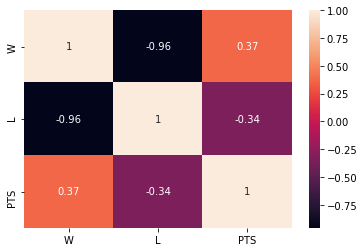

In [65]:
sns.heatmap(team_corr, annot = True)
plt.show()

In [66]:
#We can say that W and L has very strong negative corr
#Also can say that W and pts has positive corr but not strong
#Last one L and pts has negative corr and not strong

In [67]:
statsN_corr = statsN[["age","g","mp","pts"]].corr()
statsN_corr

,age,g,mp,pts
age,1.000000,0.054290,0.108777,0.042277
g,0.054290,1.000000,0.653229,0.540280
mp,0.108777,0.653229,1.000000,0.892069
pts,0.042277,0.540280,0.892069,1.000000


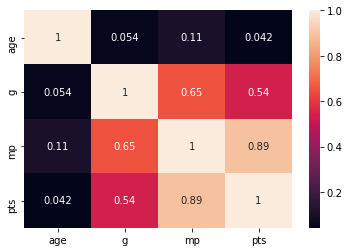

In [68]:
sns.heatmap(statsN_corr, annot = True)
plt.show()

In [69]:
#We can say g(games) between mp(minute playes), g between pts(points) and mp between pts has positive strong corr
#We can say that it has low correlation for all of them regarding age.

In [70]:
statsN.corr()

,Unnamed: 0,age,g,gs,mp,fg,fga,fgpercent,p3,pa3,...,ftpercent,orb,drb,trb,ast,stl,blk,tov,pf,pts
Unnamed: 0,1.000000,0.032764,-0.136761,-0.081529,-0.074601,-0.104627,-0.130391,0.099873,0.328817,0.405223,...,0.049422,-0.175056,0.009937,-0.138728,-0.069706,-0.125385,-0.042675,-0.190755,-0.276405,-0.079150
age,0.032764,1.000000,0.054290,0.029509,0.108777,0.036910,0.038416,0.019403,0.106334,0.089673,...,0.117352,-0.023277,0.066770,0.040246,0.091124,0.006802,-0.015148,-0.012047,0.039960,0.042277
g,-0.136761,0.054290,1.000000,0.543938,0.653229,0.546125,0.538949,0.283385,0.251272,0.206322,...,0.184329,0.348052,0.453652,0.448289,0.369842,0.418863,0.198263,0.460643,0.539429,0.540280
gs,-0.081529,0.029509,0.543938,1.000000,0.817836,0.706354,0.686369,0.264489,0.292811,0.241479,...,0.170888,0.405496,0.580457,0.551918,0.480734,0.547554,0.294508,0.635914,0.511904,0.695870
mp,-0.074601,0.108777,0.653229,0.817836,1.000000,0.888025,0.894722,0.253392,0.458502,0.419649,...,0.265867,0.498108,0.713921,0.678974,0.658965,0.722597,0.315921,0.815577,0.707905,0.892069
fg,-0.104627,0.036910,0.546125,0.706354,0.888025,1.000000,0.980110,0.317129,0.390917,0.336898,...,0.284757,0.466589,0.649071,0.625924,0.588400,0.651333,0.290872,0.829805,0.591744,0.989442
fga,-0.130391,0.038416,0.538949,0.686369,0.894722,0.980110,1.000000,0.178206,0.448655,0.424974,...,0.307419,0.394546,0.605625,0.590907,0.616711,0.672257,0.224934,0.832234,0.585982,0.978917
fgpercent,0.099873,0.019403,0.283385,0.264489,0.253392,0.317129,0.178206,1.000000,0.026676,-0.109631,...,-0.017859,0.431035,0.367471,0.333041,0.081331,0.132690,0.342934,0.230361,0.284644,0.285998
p3,0.328817,0.106334,0.251272,0.292811,0.458502,0.390917,0.448655,0.026676,1.000000,0.979227,...,0.246891,-0.084684,0.275075,0.182984,0.233544,0.236077,-0.008533,0.252983,0.192264,0.459117
pa3,0.405223,0.089673,0.206322,0.241479,0.419649,0.336898,0.424974,-0.109631,0.979227,1.000000,...,0.263756,-0.191920,0.172456,0.067424,0.290358,0.260499,-0.114941,0.242269,0.096857,0.412653


In [71]:
team.corr()

,id,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
id,1.000000,0.084571,0.011825,0.012728,-0.000461,0.067666,-0.617468,-0.605693,-0.600804,-0.259123,...,-0.641934,-0.346195,-0.295642,0.174004,-0.017606,0.074845,0.079941,0.428310,-0.713341,0.000770
GP,0.084571,1.000000,0.144809,0.145513,-0.000209,-0.055936,0.135902,0.083806,0.054974,0.070785,...,0.055364,0.027132,0.103929,-0.025221,-0.023600,-0.056807,-0.065663,0.201956,-0.109029,-0.000305
W,0.011825,0.144809,1.000000,-0.957857,0.988424,-0.034593,0.374752,0.312722,-0.061399,0.581922,...,0.342417,0.250741,0.360095,-0.362075,0.158088,0.256646,-0.438510,-0.204259,-0.002004,0.959899
L,0.012728,0.145513,-0.957857,1.000000,-0.988382,0.018351,-0.335260,-0.288360,0.077352,-0.561312,...,-0.326309,-0.242838,-0.329886,0.354715,-0.164922,-0.273111,0.419402,0.262867,-0.029649,-0.959887
WIN%,-0.000461,-0.000209,0.988424,-0.988382,1.000000,-0.021242,0.359651,0.305065,-0.069526,0.579280,...,0.339473,0.252130,0.347927,-0.360206,0.164676,0.267815,-0.432171,-0.236272,0.013911,0.971436
MIN,0.067666,-0.055936,-0.034593,0.018351,-0.021242,1.000000,-0.088204,-0.073040,-0.048967,-0.059543,...,-0.047559,-0.037289,-0.061723,0.027104,-0.064912,-0.002404,-0.017517,0.079011,-0.002315,-0.042537
PTS,-0.617468,0.135902,0.374752,-0.335260,0.359651,-0.088204,1.000000,0.918155,0.713251,0.628397,...,0.664334,0.473366,0.574151,-0.191632,0.150788,0.038385,-0.195744,-0.188804,0.450149,0.376971
FGM,-0.605693,0.083806,0.312722,-0.288360,0.305065,-0.073040,0.918155,1.000000,0.791074,0.666808,...,0.638997,0.479954,0.662804,-0.229596,0.165568,0.076066,-0.196699,-0.270494,0.400106,0.318570
FGA,-0.600804,0.054974,-0.061399,0.077352,-0.069526,-0.048967,0.713251,0.791074,1.000000,0.072792,...,0.597951,0.611256,0.468680,-0.184560,0.181656,-0.032080,0.087465,-0.217911,0.244553,-0.059069
FG%,-0.259123,0.070785,0.581922,-0.561312,0.579280,-0.059543,0.628397,0.666808,0.072792,1.000000,...,0.310265,0.036357,0.505138,-0.151070,0.049562,0.162284,-0.426511,-0.176101,0.362896,0.588723


# Predictions 

# Here I have estimated the number of wins a team can get in the next years and estimated the number of avg. points a player can score in the next years.

In [72]:
season = team[team["TEAM"]=="Boston Celtics"].SEASON
print("Take season of Boston Celtics")
print(season)
win = team[team["TEAM"]=="Boston Celtics"].W
print("Take win of Boston Celtics")
print(win)

Take season of Boston Celtics
1      2018-19
31     2017-18
61     2016-17
91     2015-16
121    2014-15
151    2013-14
181    2012-13
211    2011-12
241    2010-11
271    2009-10
301    2008-09
331    2007-08
361    2006-07
391    2005-06
421    2004-05
451    2003-04
480    2002-03
509    2001-02
538    2000-01
Name: SEASON, dtype: object
Take win of Boston Celtics
1      49
31     55
61     53
91     48
121    40
151    25
181    41
211    39
241    56
271    50
301    62
331    66
361    24
391    33
421    45
451    36
480    44
509    49
538    36
Name: W, dtype: int64


In [73]:
seasonsChangeIndex = pd.Series(season.index,index=range(1,20,1))
seasonsChangeIndex

1       1
2      31
3      61
4      91
5     121
6     151
7     181
8     211
9     241
10    271
11    301
12    331
13    361
14    391
15    421
16    451
17    480
18    509
19    538
dtype: int64

In [74]:
season_index = np.array(seasonsChangeIndex.index)
print("Take season index in numpy array")
print(season_index)

Take season index in numpy array
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


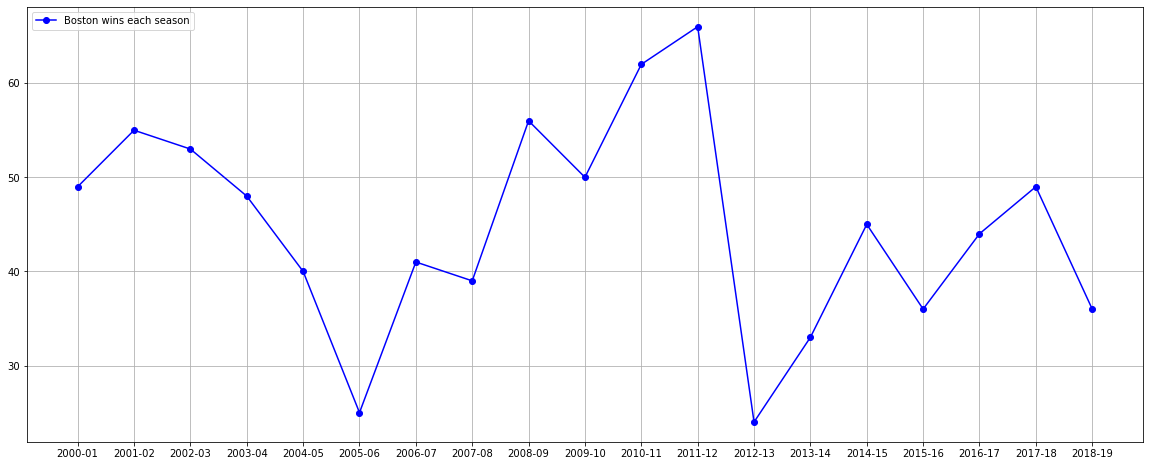

In [75]:
plt.figure(figsize=(20,8))
plt.grid()
plt.plot(season[::-1],win,color="blue",marker="o",label="Boston wins each season")
plt.legend(loc=2)

In [76]:
#POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
linreg = LinearRegression()
season_indexShape = season_index.reshape(-1,1)
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(season_indexShape)
poly.fit(X_poly,win)
linreg.fit(X_poly,win)
y_pred = linreg.predict(X_poly)

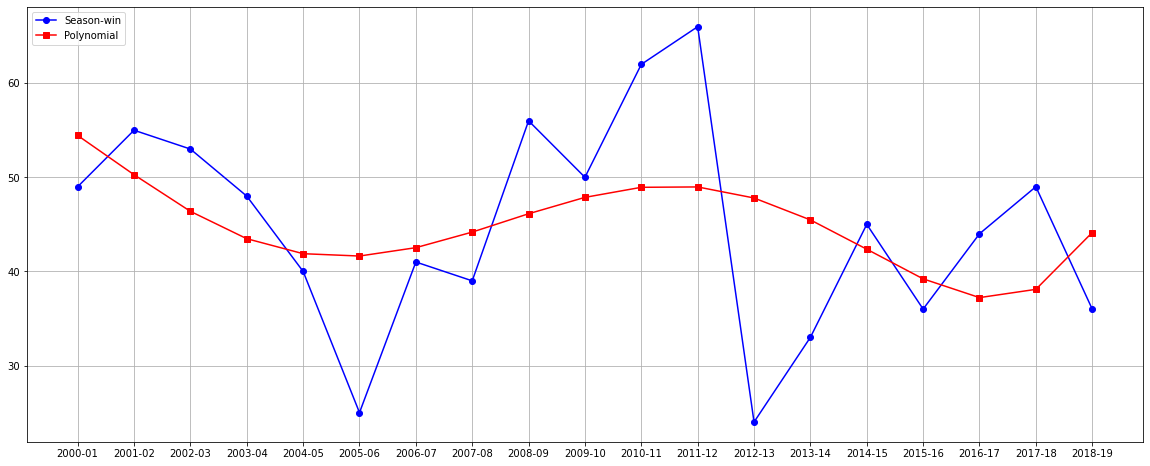

In [77]:
plt.figure(figsize=(20,8))
plt.grid()
plt.plot(season[::-1],win,color="blue",marker="o",label="Season-win")
plt.plot(season[::-1],y_pred,color="red",marker="s",label="Polynomial")
plt.legend(loc=2)

In [78]:
#POLY PREDICT
N = team[team["TEAM"]=="Boston Celtics"].count().SEASON
poly_model = make_pipeline(PolynomialFeatures(4),LinearRegression())
poly_model.fit(season_indexShape,win)
x_test = np.linspace(0,22,N+5).reshape(-1,1)
y_test = poly_model.predict(x_test)

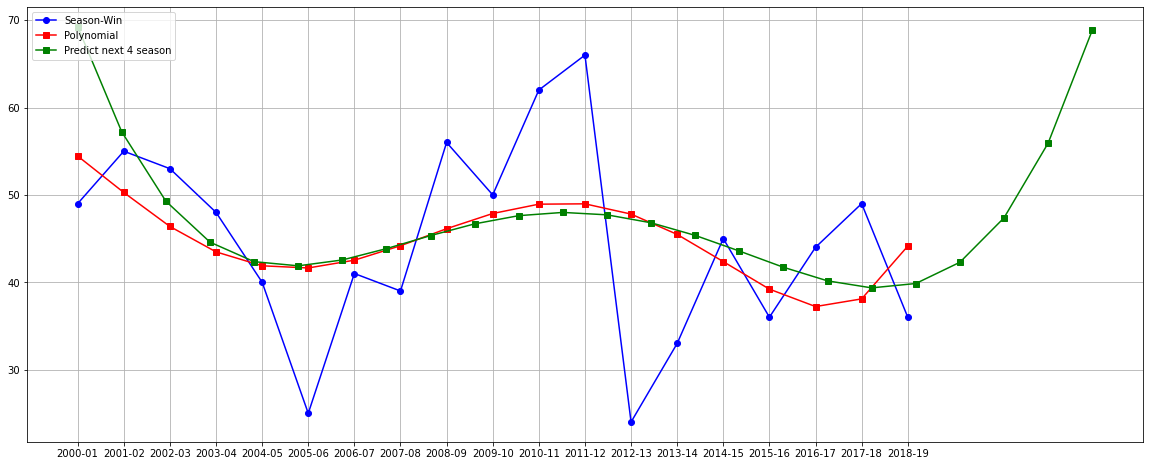

In [79]:
plt.figure(figsize=(20,8))
plt.grid()
plt.plot(season[::-1],win,color="blue",marker="o",label="Season-Win")
plt.plot(season[::-1],y_pred,color="red",marker="s",label="Polynomial")
plt.plot(x_test,y_test,marker="s",color="green",label="Predict next 4 season")
plt.legend(loc=2)

In [80]:
print("Estimated wins for next 4 years:" + str(y_test[-4:]))

Estimated wins for next 4 years:[42.28555522 47.37019452 55.91938185 68.83230134]


In [81]:
LbjSeason = statsN[statsN["player"]=="LeBron James"].year
print(LbjSeason)
LbjPts = statsN[statsN["player"]=="LeBron James"].pts
print(LbjPts)

13987    2003-04
14439    2004-05
14893    2005-06
15349    2006-07
15811    2007-08
16259    2008-09
16717    2009-10
17162    2010-11
17618    2011-12
18073    2012-13
18555    2013-14
19044    2014-15
19520    2015-16
19994    2016-17
20508    2017-18
21054    2018-19
21572    2019-20
Name: year, dtype: object
13987    20.9
14439    27.2
14893    31.4
15349    27.3
15811    30.0
16259    28.4
16717    29.7
17162    26.7
17618    27.1
18073    26.8
18555    27.1
19044    25.3
19520    25.3
19994    26.4
20508    27.5
21054    27.4
21572    25.3
Name: pts, dtype: float64


In [82]:
LbjseasonsChangeIndex = pd.Series(LbjSeason.index,index=range(1,18,1))
LbjseasonsChangeIndex

1     13987
2     14439
3     14893
4     15349
5     15811
6     16259
7     16717
8     17162
9     17618
10    18073
11    18555
12    19044
13    19520
14    19994
15    20508
16    21054
17    21572
dtype: int64

In [83]:
Lbjseason_index = np.array(LbjseasonsChangeIndex.index)
print("Take season index in numpy array")
print(Lbjseason_index)

Take season index in numpy array
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


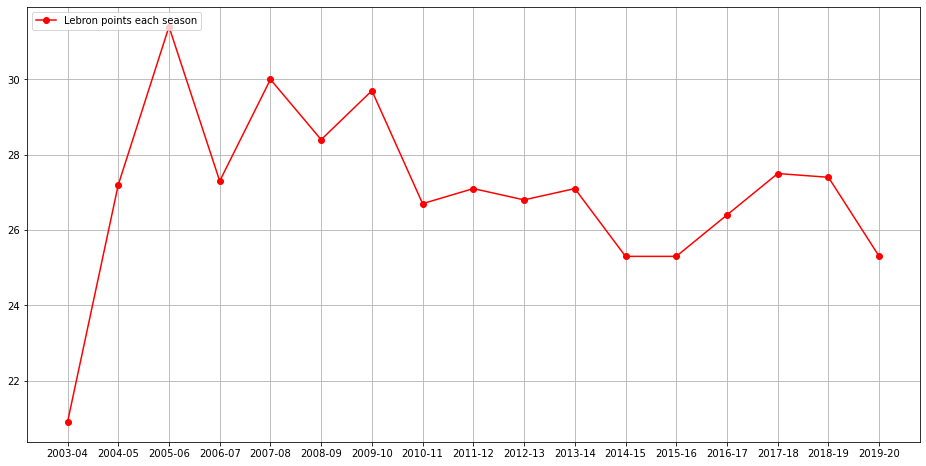

In [84]:
plt.figure(figsize=(16,8))
plt.plot(LbjSeason,LbjPts,color="red",marker="o",label="Lebron points each season")
plt.legend(loc=2)
plt.grid()

In [85]:
linreg = LinearRegression()
poly = PolynomialFeatures(degree=5)
Lbjseason_indexShape = Lbjseason_index.reshape(-1,1)
X_polyLbj = poly.fit_transform(Lbjseason_indexShape)
poly.fit(X_poly,LbjPts)
linreg.fit(X_polyLbj,LbjPts)
y_predLbj = linreg.predict(X_polyLbj)

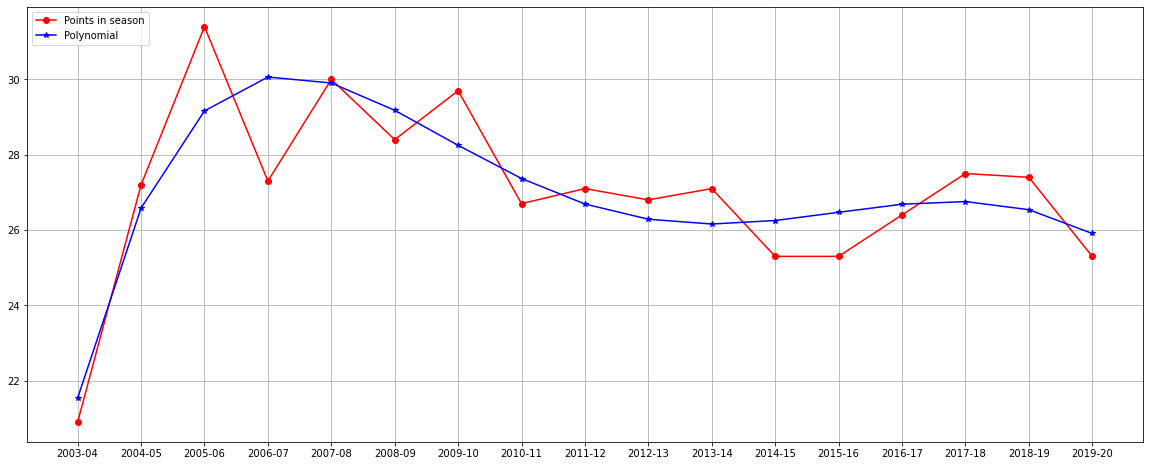

In [86]:
plt.figure(figsize=(20,8))
plt.grid()
plt.plot(LbjSeason,LbjPts,color="red",marker="o",label="Points in season")
plt.plot(LbjSeason,y_predLbj,color="blue",marker="*",label="Polynomial")
plt.legend(loc=2)

In [87]:
#POLY PREDICT
N = statsN[statsN["player"]=="LeBron James"].count().year
poly_model = make_pipeline(PolynomialFeatures(2),LinearRegression())
poly_model.fit(Lbjseason_indexShape,LbjPts)
Lbjx_test = np.linspace(0,20,N+3).reshape(-1,1)
Lbjy_test = poly_model.predict(Lbjx_test)

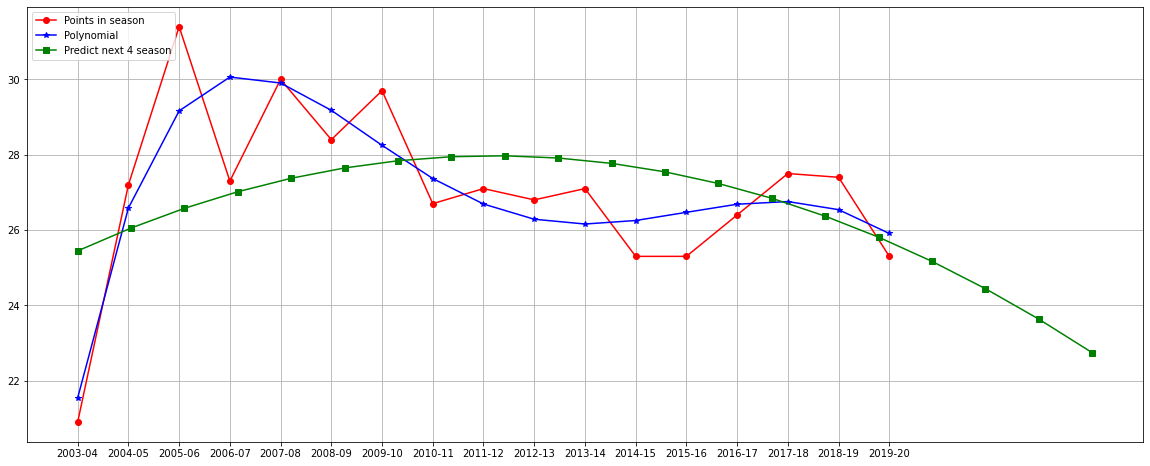

In [88]:
plt.figure(figsize=(20,8))
plt.grid()
plt.plot(LbjSeason,LbjPts,color="red",marker="o",label="Points in season")
plt.plot(LbjSeason,y_predLbj,color="blue",marker="*",label="Polynomial")
plt.plot(Lbjx_test,Lbjy_test,color="green",marker="s",label="Predict next 4 season")
plt.legend(loc=2)

In [89]:
print("Estimated wins for next 4 years:" + str(Lbjy_test[-4:]))

Estimated wins for next 4 years:[25.16704766 24.44180974 23.63329781 22.74151187]


# Conclusion
- We saw the NBA statistics of Turkish players.
- We found that a player can be important to the team.
- We have shown that the number of foreign players can affect the victory.
- We saw what predictions could come out.

In [90]:
print("RIP Kobe Bean Bryant")

RIP Kobe Bean Bryant
